# Portfolio Optimization

## Old Data

In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('all_stocks_5yr.csv')

# Print unique values in the 'name' column
print(df['Name'].unique())

['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB' 'ALGN' 'ALK' 'ALLE' 'ALL' 'ALXN' 'AMAT' 'AMD' 'AME' 'AMGN'
 'AMG' 'AMP' 'AMT' 'AMZN' 'ANDV' 'ANSS' 'ANTM' 'AON' 'AOS' 'APA' 'APC'
 'APD' 'APH' 'APTV' 'ARE' 'ARNC' 'ATVI' 'AVB' 'AVGO' 'AVY' 'AWK' 'AXP'
 'AYI' 'AZO' 'A' 'BAC' 'BAX' 'BA' 'BBT' 'BBY' 'BDX' 'BEN' 'BF.B' 'BHF'
 'BHGE' 'BIIB' 'BK' 'BLK' 'BLL' 'BMY' 'BRK.B' 'BSX' 'BWA' 'BXP' 'CAG'
 'CAH' 'CAT' 'CA' 'CBG' 'CBOE' 'CBS' 'CB' 'CCI' 'CCL' 'CDNS' 'CELG' 'CERN'
 'CFG' 'CF' 'CHD' 'CHK' 'CHRW' 'CHTR' 'CINF' 'CI' 'CLX' 'CL' 'CMA' 'CMCSA'
 'CME' 'CMG' 'CMI' 'CMS' 'CNC' 'CNP' 'COF' 'COG' 'COL' 'COO' 'COP' 'COST'
 'COTY' 'CPB' 'CRM' 'CSCO' 'CSRA' 'CSX' 'CTAS' 'CTL' 'CTSH' 'CTXS' 'CVS'
 'CVX' 'CXO' 'C' 'DAL' 'DE' 'DFS' 'DGX' 'DG' 'DHI' 'DHR' 'DISCA' 'DISCK'
 'DISH' 'DIS' 'DLR' 'DLTR' 'DOV' 'DPS' 'DRE' 'DRI' 'DTE' 'DUK' 'DVA' 'DVN'
 'DWDP' 'DXC' 'D' 'EA' 'EBAY' 'ECL' 'ED' 'EFX' 'EIX' 'E

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [4]:
import pandas as pd

# Load datasets
stocks_df = pd.read_csv("all_stocks_5yr.csv")
selected_df = pd.read_csv("selected_company_sample.csv")

# Filter stock data for selected companies
selected_symbols = selected_df['Symbol'].unique()
filtered_df = stocks_df[stocks_df['Name'].isin(selected_symbols)].copy()

# Convert 'date' to datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Pivot to get wide-format price data
price_data = filtered_df.pivot(index='date', columns='Name', values='close')

# Drop any rows with missing values (to ensure clean returns data)
price_data = price_data.dropna()

# Calculate daily returns
returns = price_data.pct_change().dropna()

# Display structure
print("Price Data (head):")
print(price_data.head())

print("\nDaily Returns (head):")
print(returns.head())


Price Data (head):
Name         AVGO    AXP     BAC     CB     CMG     EA   EBAY   GRMN     IBM  \
date                                                                           
2013-02-08  35.32  61.80  11.760  86.20  320.72  17.37  56.62  38.08  201.68   
2013-02-11  35.40  61.98  11.860  86.41  323.56  17.41  56.41  37.87  200.16   
2013-02-12  35.14  62.20  12.245  86.82  322.51  17.54  56.78  37.68  200.04   
2013-02-13  35.17  62.10  12.170  86.66  317.01  17.17  57.05  38.56  200.09   
2013-02-14  35.64  62.34  12.130  86.44  317.72  17.15  56.83  38.97  199.65   

Name           IT    LEG     MHK     MS    ORLY     XL  
date                                                    
2013-02-08  49.75  29.74  103.11  23.32  101.57  28.24  
2013-02-11  49.49  29.58  104.84  23.28  102.40  28.31  
2013-02-12  49.37  29.90  106.38  23.63  101.56  28.41  
2013-02-13  48.90  30.24  107.57  23.63  102.00  28.42  
2013-02-14  48.53  30.60  107.05  23.83  101.68  28.22  

Daily Returns (head)

In [20]:
pip install cvxpy

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/887.3 kB ? eta -:--:--
   ---------------------------------------- 887.3/887.3 kB 8.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   ----------- ---------------------------- 2.1/7.4 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.7/7.4 MB 8.4 MB/s eta 0:00:01
   ----------------------------- ---------- 5.5/7.4 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 7.4/7.4 MB 9.2 MB/s eta 0:00:00

   ---------------------------------------- 0/4 [scs]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]
   ---------- ----------------------------- 1/4 [osqp]


Optimal Weights:
AVGO: 0.0000
AXP: 0.0442
BAC: -0.0000
CB: 0.2129
CMG: 0.0792
EA: 0.0370
EBAY: 0.0302
GRMN: 0.0512
IBM: 0.1921
IT: 0.0740
LEG: 0.0783
MHK: -0.0000
MS: -0.0000
ORLY: 0.1246
XL: 0.0763

Expected Annual Return: 10.49%
Expected Annual Volatility: 12.57%


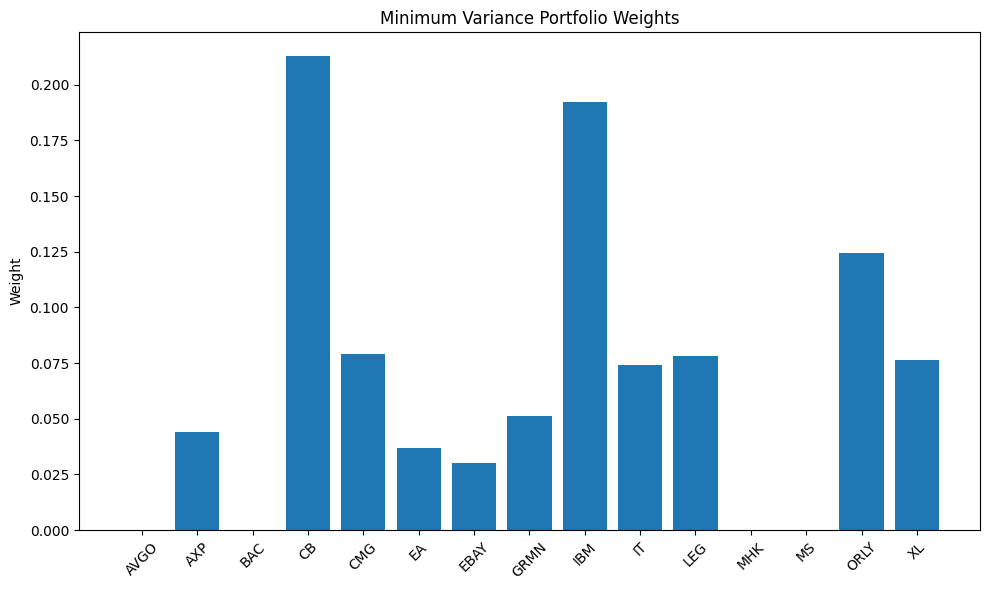

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

# --- Step 1: Assign each stock to a sector
sector_map = selected_df.set_index("Symbol")["Sector"].to_dict()
sectors = list(set(sector_map.values()))
sector_weights = {sector: 1 / len(sectors) for sector in sectors}  # Equal sector weights

# --- Step 2: Group symbols by sector
sector_groups = {sector: selected_df[selected_df['Sector'] == sector]['Symbol'].tolist() for sector in sectors}

# --- Step 3: Prepare returns matrix
symbols = returns.columns.tolist()
returns_matrix = returns[symbols].values
mean_returns = returns.mean().values
cov_matrix = returns.cov().values
n = len(symbols)

# --- Step 4: Optimization variables
weights = cp.Variable(n)
portfolio_return = mean_returns @ weights
portfolio_risk = cp.quad_form(weights, cov_matrix)

# --- Step 5: Sector constraints
constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

for sector, symbols_in_sector in sector_groups.items():
    idxs = [symbols.index(sym) for sym in symbols_in_sector]
    sector_sum = cp.sum(cp.hstack([weights[i] for i in idxs]))
    constraints.append(sector_sum == sector_weights[sector])

# --- Step 6: Solve for minimum variance portfolio
problem = cp.Problem(cp.Minimize(portfolio_risk), constraints)
problem.solve()

# --- Step 7: Results
opt_weights = weights.value
opt_return = mean_returns @ opt_weights
opt_volatility = np.sqrt(opt_weights.T @ cov_matrix @ opt_weights)

# Print results
print("Optimal Weights:")
for sym, w in zip(symbols, opt_weights):
    print(f"{sym}: {w:.4f}")

print(f"\nExpected Annual Return: {opt_return * 252:.2%}")
print(f"Expected Annual Volatility: {opt_volatility * np.sqrt(252):.2%}")

# Plot weights
plt.figure(figsize=(10,6))
plt.bar(symbols, opt_weights)
plt.title("Minimum Variance Portfolio Weights")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


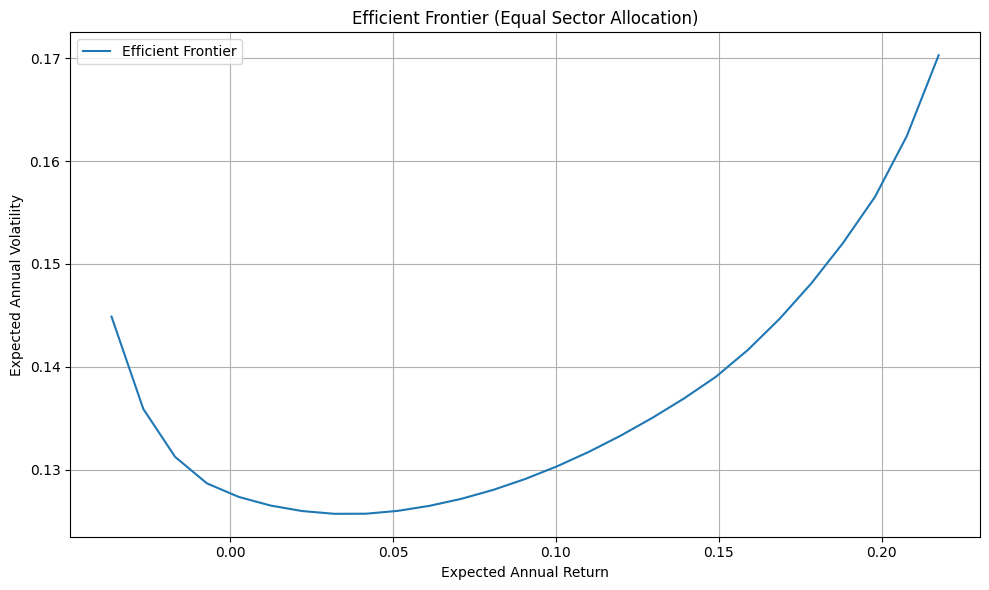

In [6]:
# --- Efficient Frontier Construction ---
target_returns = np.linspace(min(mean_returns), max(mean_returns), 50)
efficient_risks = []
efficient_weights = []

for r in target_returns:
    # Define new optimization problem for each target return
    weights_var = cp.Variable(n)
    constraints = [
        cp.sum(weights_var) == 1,
        weights_var >= 0,
        mean_returns @ weights_var == r
    ]

    # Sector allocation constraints
    for sector, symbols_in_sector in sector_groups.items():
        idxs = [symbols.index(sym) for sym in symbols_in_sector]
        sector_sum = cp.sum(cp.hstack([weights_var[i] for i in idxs]))
        constraints.append(sector_sum == sector_weights[sector])

    risk = cp.quad_form(weights_var, cov_matrix)
    prob = cp.Problem(cp.Minimize(risk), constraints)

    try:
        prob.solve()
        if weights_var.value is not None:
            efficient_risks.append(np.sqrt(risk.value))
            efficient_weights.append(weights_var.value)
    except:
        continue

# --- Plot Efficient Frontier ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in target_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')
plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier (Equal Sector Allocation)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


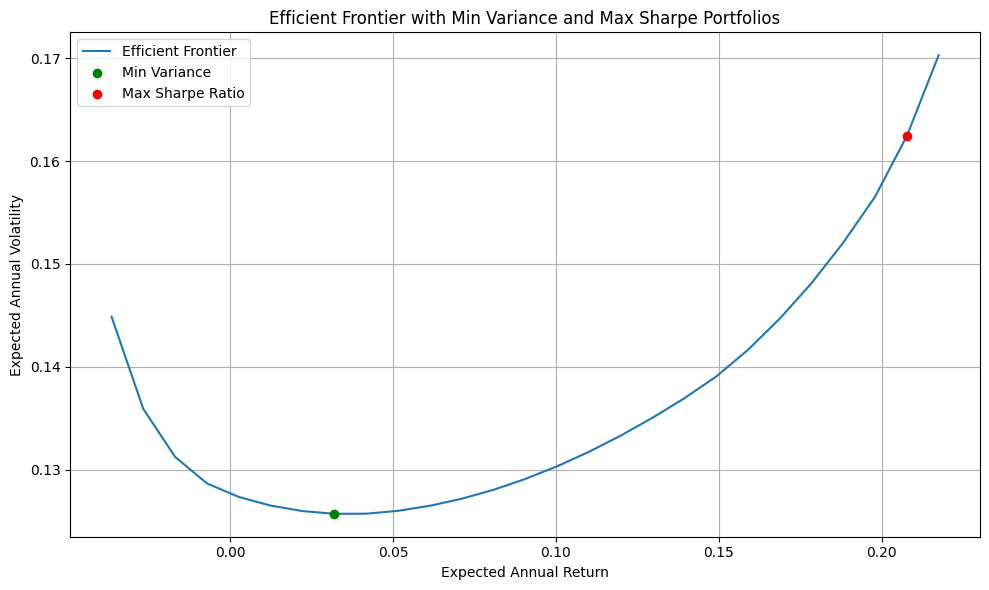


--- Minimum Variance Portfolio Weights ---
AXP: 0.0448
CB: 0.2112
CMG: 0.0819
EA: 0.0310
EBAY: 0.0315
GRMN: 0.0499
IBM: 0.2016
IT: 0.0692
LEG: 0.0805
ORLY: 0.1210
XL: 0.0773

--- Maximum Sharpe Ratio Portfolio Weights ---
AVGO: 0.1358
BAC: 0.1802
CB: 0.1531
EA: 0.1976
MHK: 0.1050
ORLY: 0.2283


In [7]:
# --- Risk-free rate (you can change this if needed) ---
rf = 0.0

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(target_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in target_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(target_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(target_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")


## New Data

### Base Version

In [8]:
import pandas as pd
import os

def clean_stock_data(filepath):
    df = pd.read_csv(filepath)

    # Standardize column names (lowercase, no special characters)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    # Rename 'close/last' to 'close' if needed
    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    # Remove dollar signs and convert to float
    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)

    # Parse dates
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]


In [9]:
df_companies = pd.read_csv("selected_company_sample.csv")
sectors = df_companies['Sector'].unique()

# Read individual stock files by sector
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        stock_data = clean_stock_data(filepath)
        data[ticker] = stock_data['close']
    return data


In [10]:
sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Symbol'].tolist()
    sector_data[sector] = load_sector_data(tickers)


In [11]:
sector_returns = {sector: df.pct_change().dropna() for sector, df in sector_data.items()}

C:\Users\longo\AppData\Local\Temp\ipykernel_22316\3616715255.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: df.pct_change().dropna() for sector, df in sector_data.items()}


In [12]:
from scipy.optimize import minimize
import numpy as np

def get_optimal_weights(returns):
    n = returns.shape[1]

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_weights = np.array([1/n] * n)

    result = minimize(portfolio_volatility, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x


In [13]:
all_tickers = []
all_weights = []

for sector in sectors:
    tickers = sector_returns[sector].columns
    weights = get_optimal_weights(sector_returns[sector])
    scaled_weights = weights * (1 / len(sectors))  # Equal sector allocation
    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by="Weight", ascending=False)

print(final_portfolio)


   Ticker        Weight
8      CB  2.431552e-01
4    ORLY  1.291334e-01
10    IBM  1.261496e-01
2    GRMN  1.155412e-01
12     EA  8.694362e-02
11   EBAY  6.223687e-02
0     CMG  5.898239e-02
14     IT  5.800330e-02
9     AXP  4.580423e-02
6      MS  2.676775e-02
3     LEG  2.572117e-02
5     BAC  1.381512e-02
1     MHK  3.955149e-03
7      XL  3.791035e-03
13   AVGO  1.102272e-18


Final Portfolio Allocation (Equal Sector Allocation):
   Ticker        Weight
0      CB  2.431552e-01
1    ORLY  1.291334e-01
2     IBM  1.261496e-01
3    GRMN  1.155412e-01
4      EA  8.694362e-02
5    EBAY  6.223687e-02
6     CMG  5.898239e-02
7      IT  5.800330e-02
8     AXP  4.580423e-02
9      MS  2.676775e-02
10    LEG  2.572117e-02
11    BAC  1.381512e-02
12    MHK  3.955149e-03
13     XL  3.791035e-03
14   AVGO  1.102272e-18


C:\Users\longo\AppData\Local\Temp\ipykernel_22316\3314903877.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}


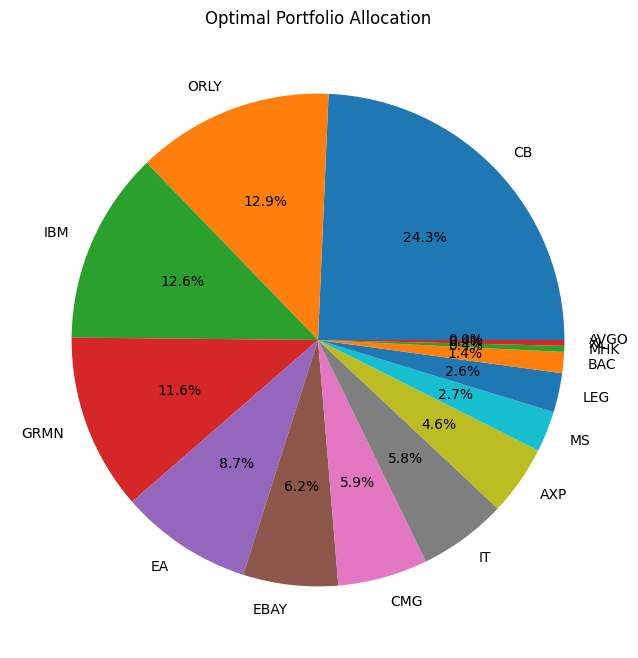

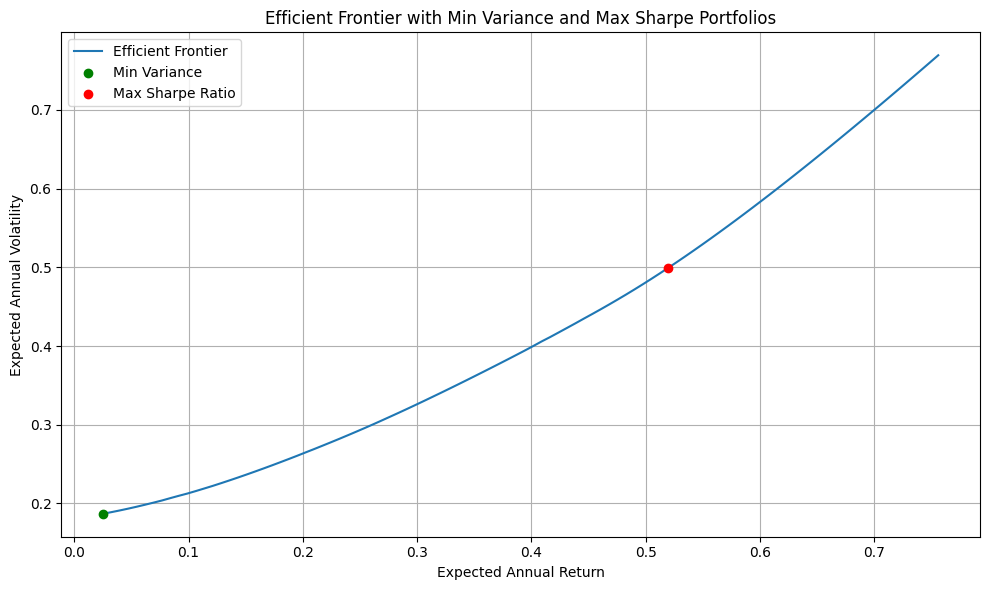


--- Minimum Variance Portfolio Weights ---
CMG: 0.0648
GRMN: 0.0412
LEG: 0.1321
ORLY: 0.0713
XL: 0.0308
CB: 0.1639
IBM: 0.1997
EBAY: 0.0880
EA: 0.2084

--- Maximum Sharpe Ratio Portfolio Weights ---
LEG: 0.7714
XL: 0.2286


In [14]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Efficient Frontier and Sharpe Ratio Analysis ===
returns_df = pd.concat(sector_returns.values(), axis=1).dropna()

symbols = returns_df.columns
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()
n_assets = len(symbols)

# Generate efficient frontier
efficient_returns = []
efficient_risks = []
efficient_weights = []

for target_return in np.linspace(0.0001, 0.003, 100):
    def portfolio_stats(weights):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)

# --- Risk-free rate (you can change this if needed) ---
rf = 0.0

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in efficient_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(efficient_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(efficient_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")


### Enanched Version

Final Portfolio Allocation (Equal Sector Allocation):
   Ticker        Weight
0      CB  1.340393e-01
1    ORLY  1.262290e-01
2     IBM  1.242830e-01
3    GRMN  1.131929e-01
4      EA  8.692634e-02
5     AXP  7.147067e-02
6    EBAY  6.296407e-02
7      MS  6.084505e-02
8     BAC  6.070550e-02
9     CMG  6.037037e-02
10     IT  5.915997e-02
11    LEG  2.742648e-02
12     XL  6.272809e-03
13    MHK  6.114575e-03
14   AVGO  2.258755e-19


C:\Users\longo\AppData\Local\Temp\ipykernel_22316\3369274320.py:108: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}


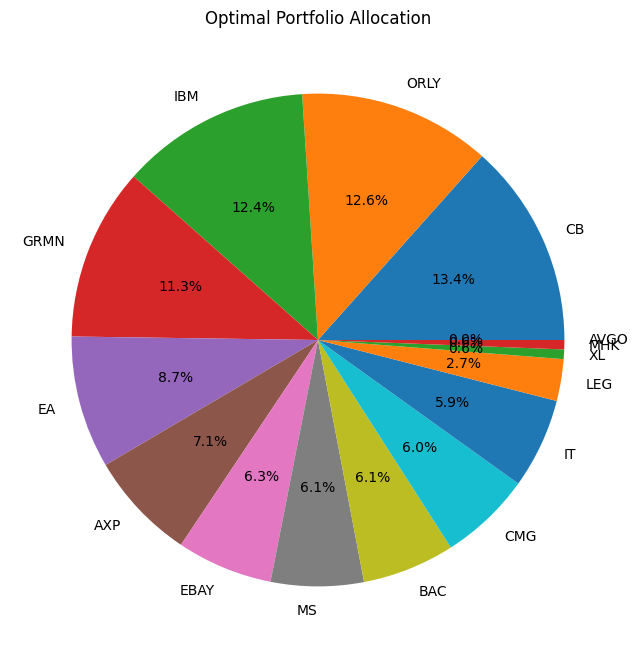


--- Portfolio Sensitivity to Parameter Noise ---
MHK: Original=0.0217, Perturbed=0.0000, Δ=0.0217
LEG: Original=0.7184, Perturbed=0.7635, Δ=0.0451
XL: Original=0.2598, Perturbed=0.2365, Δ=0.0233


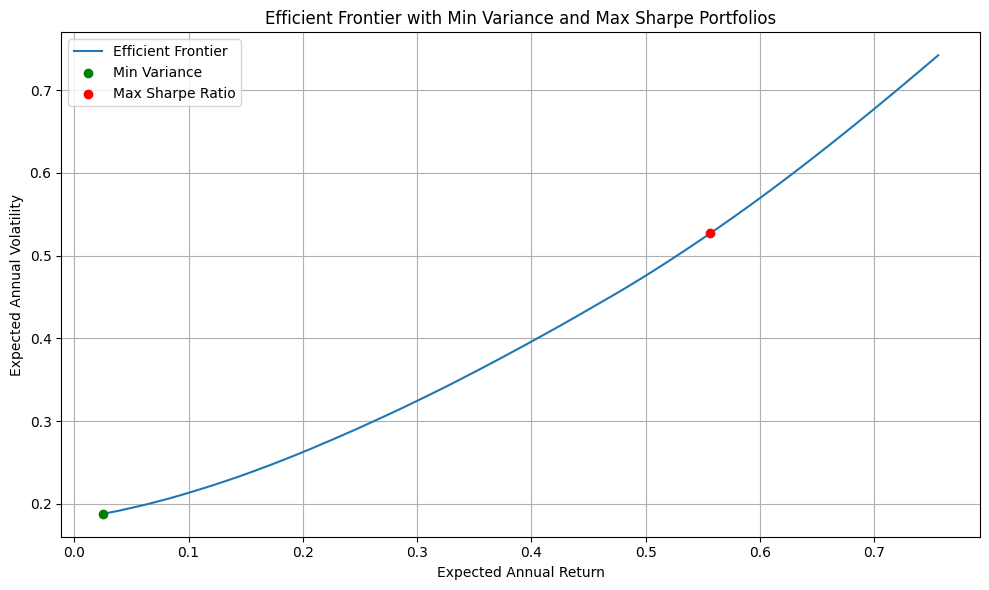


--- Minimum Variance Portfolio Weights ---
CMG: 0.0767
MHK: 0.0162
GRMN: 0.0635
LEG: 0.1226
ORLY: 0.0852
XL: 0.0335
CB: 0.1452
IBM: 0.1684
EBAY: 0.0967
EA: 0.1797
IT: 0.0124

--- Maximum Sharpe Ratio Portfolio Weights ---
MHK: 0.0217
LEG: 0.7184
XL: 0.2598

--- Tangency Portfolio (Max Sharpe) ---
Expected Return: 0.5567
Volatility:      0.5271
Sharpe Ratio:    0.0665
Weights:
  MHK: 0.0217
  LEG: 0.7184
  XL: 0.2598

Expected Shortfall (95% CVaR):
 - Min Variance Portfolio: 0.0236
 - Max Sharpe Portfolio:   0.0625

Diversification Metrics:
 - Min Variance Portfolio: Entropy = 2.1884, Herfindahl = 0.1248
 - Max Sharpe Portfolio:   Entropy = 0.6710, Herfindahl = 0.5841

--- Risk Contributions (as % of total volatility) ---
Min Variance Portfolio:
LEG: 15.86%
XL: 9.73%
CB: 12.53%
IBM: 15.69%
EBAY: 8.47%
EA: 16.57%

Max Sharpe Portfolio:
LEG: 30.41%
XL: 69.02%


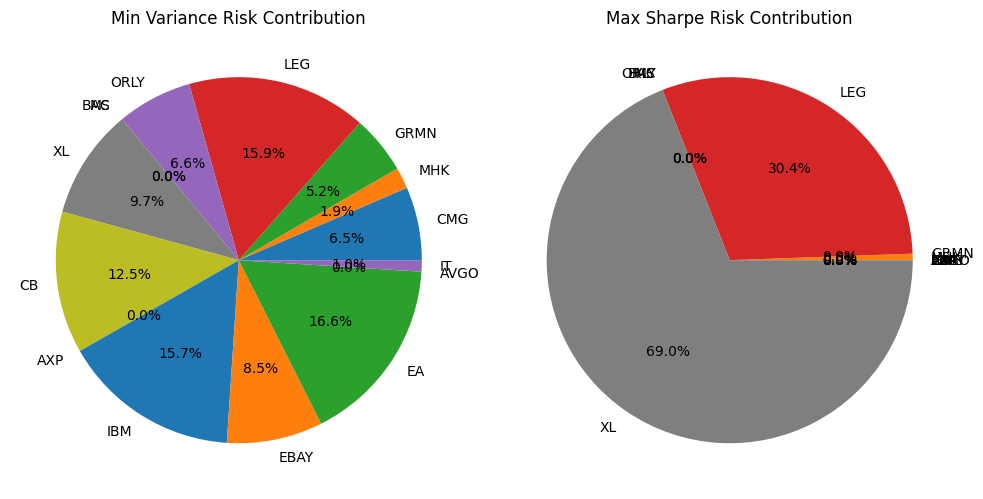


Performance Metrics (Downside Risk Adjusted):
 - Min Variance Portfolio: Sortino = 0.0137, Calmar = 0.0550
 - Max Sharpe Portfolio:   Sortino = 0.1099, Calmar = 0.9336


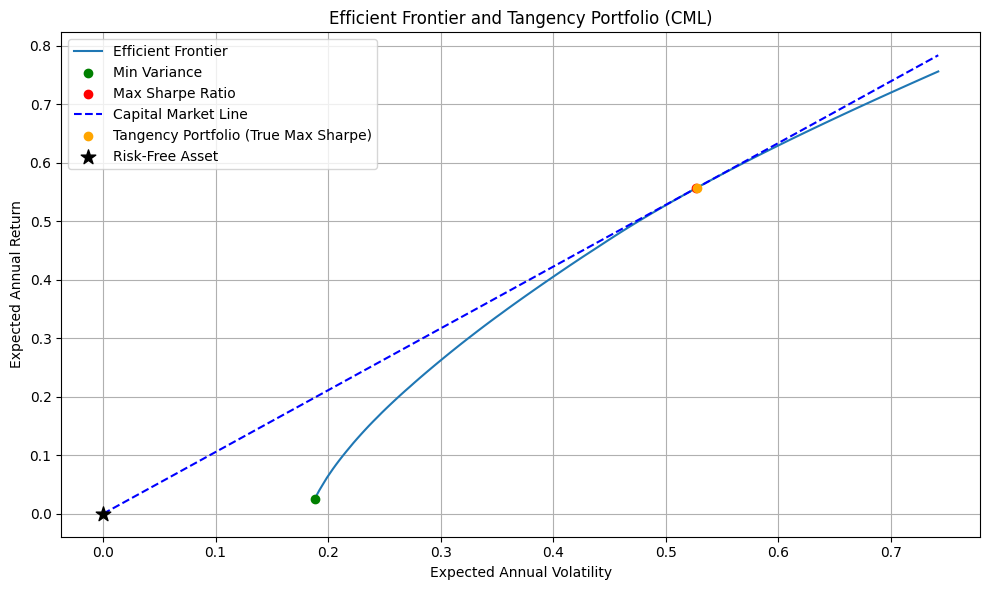


--- Tangency Portfolio (True Max Sharpe) ---
Expected Return: 0.5572
Volatility:      0.5276
Sharpe Ratio:    1.0562
Weights:
  MHK: 0.0233
  LEG: 0.7164
  XL: 0.2604

Portfolio weights saved to CSV files:
- final_portfolio.csv (Equal Sector Allocation)
- min_variance_portfolio.csv (Minimum Variance Portfolio)
- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)


In [23]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# Ledoit-Wolf Shrinkage Estimator
def expected_shortfall(returns, alpha=0.05):
    """
    Computes Expected Shortfall (CVaR) at given confidence level alpha.
    Assumes returns is a 1D NumPy array.
    """
    sorted_returns = np.sort(returns)
    cutoff_index = int(np.ceil(alpha * len(sorted_returns)))
    return -np.mean(sorted_returns[:cutoff_index])

# Entropy and Herfindahl Index
def entropy(weights):
    """Shannon entropy of portfolio weights."""
    weights = np.array(weights)
    return -np.sum(weights * np.log(weights + 1e-10))  # avoid log(0)

def herfindahl(weights):
    """Herfindahl-Hirschman Index (HHI), a concentration measure."""
    weights = np.array(weights)
    return np.sum(weights**2)

# Risk Contribution Function
def risk_contributions(weights, cov_matrix):
    """
    Compute the risk contribution of each asset to total portfolio volatility.
    """
    weights = np.array(weights)
    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    mrc = (cov_matrix @ weights) / port_vol  # marginal risk contribution
    rc = weights * mrc  # total risk contribution per asset
    return rc, port_vol

# Sortino & Calmar Ratios
def sortino_ratio(returns, target=0):
    """Sortino ratio using downside standard deviation."""
    downside = returns[returns < target]
    downside_std = np.std(downside) if len(downside) > 0 else 1e-6
    return (returns.mean() - target) / downside_std

def calmar_ratio(returns):
    """Calmar ratio = return / max drawdown (uses cumulative returns)."""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    annual_return = returns.mean() * 252
    return annual_return / abs(max_drawdown) if max_drawdown < 0 else np.nan

np.random.seed(42)

# Perturbation Function
def perturb_parameters(mu, cov, k_mu=0.1, k_cov=0.1):
    """Apply noise to mean vector and covariance matrix."""
    mu_perturbed = mu * (1 + np.random.normal(0, k_mu, size=mu.shape))
    noise = np.random.normal(0, k_cov, size=cov.shape)
    cov_perturbed = cov + (cov * noise)
    cov_perturbed = (cov_perturbed + cov_perturbed.T) / 2  # ensure symmetry
    return mu_perturbed, cov_perturbed

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        # print(f"Loading: {filepath}")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    # Use Ledoit-Wolf shrinkage
    lw = LedoitWolf().fit(returns)
    cov = lw.covariance_ * 252  # <-- Annualized like before

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Efficient Frontier and Sharpe Ratio Analysis ===
returns_df = pd.concat(sector_returns.values(), axis=1).dropna()

symbols = returns_df.columns
mean_returns = returns_df.mean()

# Compute Ledoit-Wolf shrinkage covariance matrix
lw = LedoitWolf().fit(returns_df)
cov_matrix = lw.covariance_
n_assets = len(symbols)

# === Calcola il vero portafoglio Max Sharpe (tangente alla CML) ===
def negative_sharpe(weights, mu, cov, rf=0.0):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(weights.T @ cov @ weights)
    return - (port_return - rf) / port_vol

bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(negative_sharpe, initial_guess,
                  args=(mean_returns, cov_matrix, rf),
                  method='SLSQP', bounds=bounds, constraints=constraints)

tangent_weights = result.x
tangent_return = np.dot(tangent_weights, mean_returns) * 252
tangent_vol = np.sqrt(tangent_weights.T @ cov_matrix @ tangent_weights) * np.sqrt(252)
tangent_sharpe = (tangent_return - rf) / tangent_vol

# Generate efficient frontier
efficient_returns = []
efficient_risks = []
efficient_weights = []

for target_return in np.linspace(0.0001, 0.003, 100):
    def portfolio_stats(weights):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)

annual_returns = [r * 252 for r in efficient_returns[:len(efficient_risks)]]
annual_vols = [v * np.sqrt(252) for v in efficient_risks]

# --- Risk-free rate (you can change this if needed) ---
rf = 0.0

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Simulate perturbation ---
mu_pert, cov_pert = perturb_parameters(mean_returns, cov_matrix, k_mu=0.1, k_cov=0.1)

# --- Re-optimize max Sharpe portfolio using perturbed parameters ---
def neg_sharpe(weights):
    port_return = np.dot(weights, mu_pert)
    port_vol = np.sqrt(weights.T @ cov_pert @ weights)
    return - (port_return / port_vol)

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(n_assets))
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
perturbed_weights = result.x

# --- Compare original vs perturbed ---
print("\n--- Portfolio Sensitivity to Parameter Noise ---")
diff = np.abs(max_sharpe_weights - perturbed_weights)
for sym, w_orig, w_new, d in zip(symbols, max_sharpe_weights, perturbed_weights, diff):
    if d > 0.01:
        print(f"{sym}: Original={w_orig:.4f}, Perturbed={w_new:.4f}, Δ={d:.4f}")


# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in efficient_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(efficient_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(efficient_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Tangency Portfolio (Max Sharpe) ---")
print(f"Expected Return: {annual_returns[max_sharpe_idx]:.4f}")
print(f"Volatility:      {annual_vols[max_sharpe_idx]:.4f}")
print(f"Sharpe Ratio:    {sharpe_ratios[max_sharpe_idx]:.4f}")
print("Weights:")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")

# Compute Expected Shortfall for Your Optimal Portfolios
# Compute portfolio returns
def compute_portfolio_returns(weights, returns_df):
    return returns_df @ weights

# Portfolio return series
min_var_port_returns = compute_portfolio_returns(min_var_weights, returns_df)
max_sharpe_port_returns = compute_portfolio_returns(max_sharpe_weights, returns_df)

# Expected Shortfall (CVaR) at 5% level
es_min_var = expected_shortfall(min_var_port_returns.values, alpha=0.05)
es_max_sharpe = expected_shortfall(max_sharpe_port_returns.values, alpha=0.05)

print(f"\nExpected Shortfall (95% CVaR):")
print(f" - Min Variance Portfolio: {es_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   {es_max_sharpe:.4f}")

# Diversification metrics
ent_min_var = entropy(min_var_weights)
ent_max_sharpe = entropy(max_sharpe_weights)

herf_min_var = herfindahl(min_var_weights)
herf_max_sharpe = herfindahl(max_sharpe_weights)

#E ntropy ↑ → More diversified
# Herfindahl ↓ → More diversified

print(f"\nDiversification Metrics:")
print(f" - Min Variance Portfolio: Entropy = {ent_min_var:.4f}, Herfindahl = {herf_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Entropy = {ent_max_sharpe:.4f}, Herfindahl = {herf_max_sharpe:.4f}")

# Risk Contributions
rc_min_var, vol_min_var = risk_contributions(min_var_weights, cov_matrix)
rc_max_sharpe, vol_max_sharpe = risk_contributions(max_sharpe_weights, cov_matrix)

print("\n--- Risk Contributions (as % of total volatility) ---")
print("Min Variance Portfolio:")
for sym, rc in zip(symbols, rc_min_var):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_min_var) * 100:.2f}%")

print("\nMax Sharpe Portfolio:")
for sym, rc in zip(symbols, rc_max_sharpe):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_max_sharpe) * 100:.2f}%")

# Pie chart of risk contributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(rc_min_var, labels=symbols, autopct='%1.1f%%')
plt.title('Min Variance Risk Contribution')

plt.subplot(1, 2, 2)
plt.pie(rc_max_sharpe, labels=symbols, autopct='%1.1f%%')
plt.title('Max Sharpe Risk Contribution')

plt.tight_layout()
plt.show()

# Sortino Ratios
sortino_min_var = sortino_ratio(min_var_port_returns)
sortino_max_sharpe = sortino_ratio(max_sharpe_port_returns)

# Calmar Ratios
calmar_min_var = calmar_ratio(min_var_port_returns)
calmar_max_sharpe = calmar_ratio(max_sharpe_port_returns)

# Display
print(f"\nPerformance Metrics (Downside Risk Adjusted):")
print(f" - Min Variance Portfolio: Sortino = {sortino_min_var:.4f}, Calmar = {calmar_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Sortino = {sortino_max_sharpe:.4f}, Calmar = {calmar_max_sharpe:.4f}")

# --- Plot with annotations and Capital Market Line (CML) ---
plt.figure(figsize=(10, 6))

plt.plot(annual_vols, annual_returns, label='Efficient Frontier')

# Mark key points
plt.scatter(annual_vols[min_var_idx], annual_returns[min_var_idx],
            color='green', label='Min Variance', zorder=5)
plt.scatter(annual_vols[max_sharpe_idx], annual_returns[max_sharpe_idx],
            color='red', label='Max Sharpe Ratio', zorder=5)

# Add Capital Market Line (CML) - FIXED
slope = tangent_sharpe
cml_volatility = np.linspace(0, max(annual_vols), 100)
cml_return = rf + slope * cml_volatility
plt.plot(cml_volatility, cml_return, linestyle='--', color='blue', label='Capital Market Line')
plt.scatter(tangent_vol, tangent_return,
            color='orange', label='Tangency Portfolio (True Max Sharpe)', zorder=5)

# Add risk-free point
plt.scatter(0, rf, color='black', marker='*', s=120, label='Risk-Free Asset', zorder=5)

plt.xlabel('Expected Annual Volatility')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier and Tangency Portfolio (CML)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Tangency Portfolio (True Max Sharpe) ---")
print(f"Expected Return: {tangent_return:.4f}")
print(f"Volatility:      {tangent_vol:.4f}")
print(f"Sharpe Ratio:    {tangent_sharpe:.4f}")
print("Weights:")
for sym, w in zip(symbols, tangent_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")


final_portfolio.to_csv("final_portfolio.csv", index=False)
# Save portfolio weights to CSV files
min_var_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': min_var_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

max_sharpe_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': max_sharpe_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

min_var_portfolio.to_csv("min_variance_portfolio.csv", index=False)
max_sharpe_portfolio.to_csv("max_sharpe_portfolio.csv", index=False)

print("\nPortfolio weights saved to CSV files:")
print("- final_portfolio.csv (Equal Sector Allocation)")
print("- min_variance_portfolio.csv (Minimum Variance Portfolio)")
print("- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)")

In [22]:
print("Final Portfolio Allocation (Equal Sector Allocation):")
for _, row in final_portfolio.iterrows():
    print(f"{row['Ticker']}: {row['Weight']:.4f}")

Final Portfolio Allocation (Equal Sector Allocation):
CB: 0.1340
ORLY: 0.1262
IBM: 0.1243
GRMN: 0.1132
EA: 0.0869
AXP: 0.0715
EBAY: 0.0630
MS: 0.0608
BAC: 0.0607
CMG: 0.0604
IT: 0.0592
LEG: 0.0274
XL: 0.0063
MHK: 0.0061
AVGO: 0.0000


## Risk-less add on

Final Portfolio Allocation (Equal Sector Allocation):
   Ticker        Weight
0      CB  1.340393e-01
1    ORLY  1.262290e-01
2     IBM  1.242830e-01
3    GRMN  1.131929e-01
4      EA  8.692634e-02
5     AXP  7.147067e-02
6    EBAY  6.296407e-02
7      MS  6.084505e-02
8     BAC  6.070550e-02
9     CMG  6.037037e-02
10     IT  5.915997e-02
11    LEG  2.742648e-02
12     XL  6.272809e-03
13    MHK  6.114575e-03
14   AVGO  2.258755e-19


C:\Users\longo\AppData\Local\Temp\ipykernel_26940\2924539128.py:108: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}


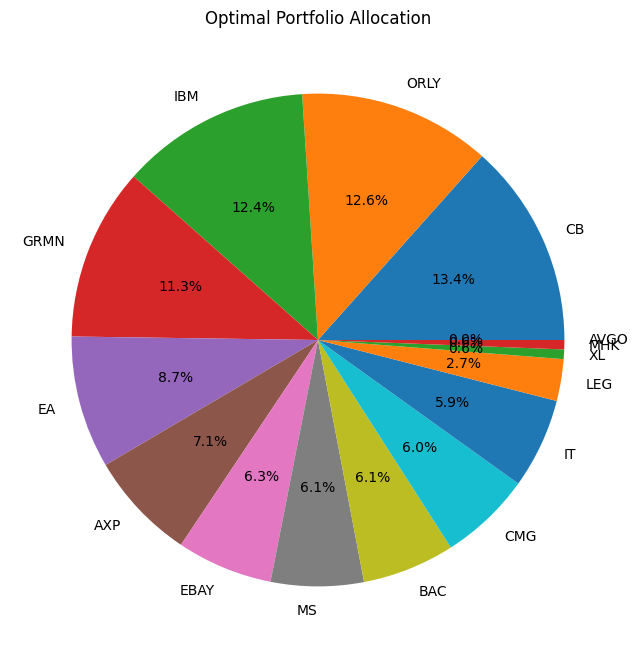


--- Portfolio Sensitivity to Parameter Noise ---
XL: Original=0.1757, Perturbed=0.1554, Δ=0.0204
RISK_FREE: Original=0.3151, Perturbed=0.3445, Δ=0.0294


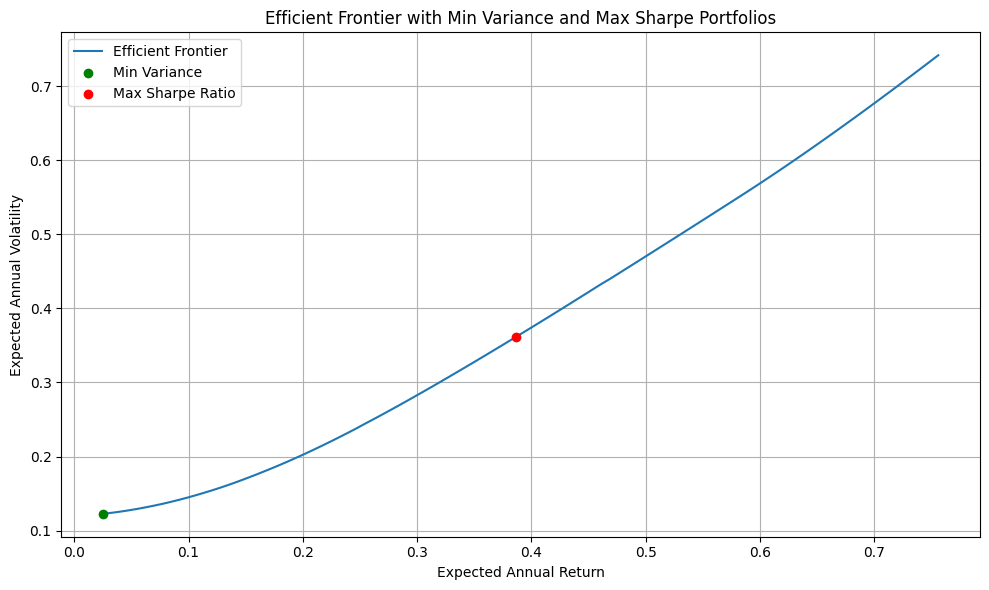


--- Minimum Variance Portfolio Weights ---
CMG: 0.0362
MHK: 0.0048
GRMN: 0.0247
LEG: 0.0499
ORLY: 0.0348
XL: 0.0149
CB: 0.0652
IBM: 0.0773
EBAY: 0.0405
EA: 0.0759
IT: 0.0041
RISK_FREE: 0.5717

--- Maximum Sharpe Ratio Portfolio Weights ---
MHK: 0.0097
LEG: 0.4994
XL: 0.1757
RISK_FREE: 0.3151

--- Tangency Portfolio (Max Sharpe) ---
Expected Return: 0.3869
Volatility:      0.3618
Sharpe Ratio:    0.0674
Weights:
  MHK: 0.0097
  LEG: 0.4994
  XL: 0.1757
  RISK_FREE: 0.3151

Expected Shortfall (95% CVaR):
 - Min Variance Portfolio: 0.0100
 - Max Sharpe Portfolio:   0.0425

Diversification Metrics:
 - Min Variance Portfolio: Entropy = 1.6102, Herfindahl = 0.3503
 - Max Sharpe Portfolio:   Entropy = 1.0613, Herfindahl = 0.3797

--- Risk Contributions (as % of total volatility) ---
Min Variance Portfolio:
RISK_FREE: 57.15%

Max Sharpe Portfolio:
LEG: 30.63%
XL: 67.00%


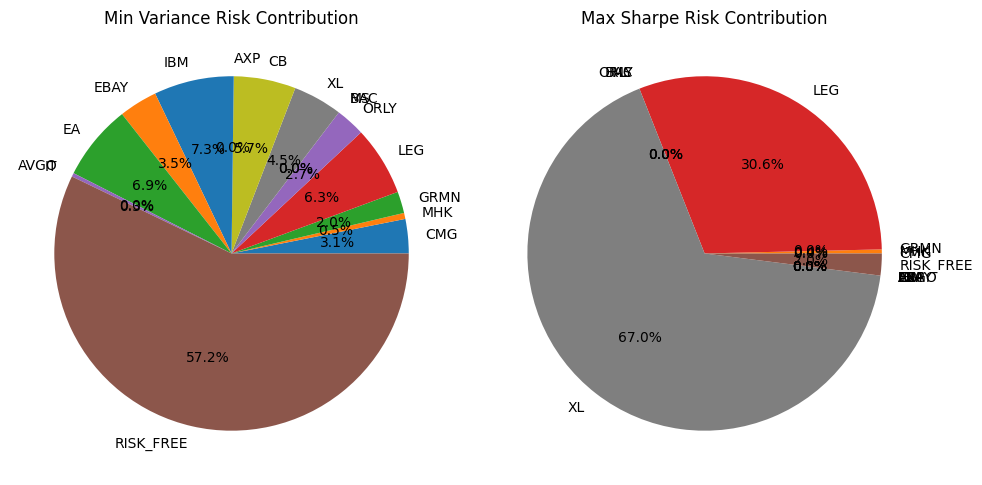


Performance Metrics (Downside Risk Adjusted):
 - Min Variance Portfolio: Sortino = 0.0321, Calmar = 0.1202
 - Max Sharpe Portfolio:   Sortino = 0.1122, Calmar = 0.8777


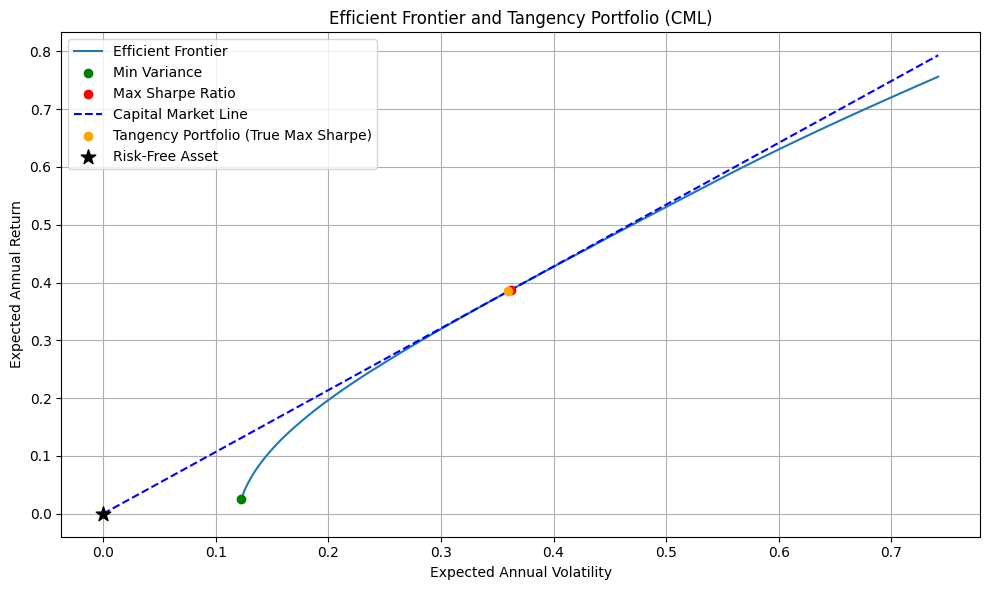


--- Tangency Portfolio (True Max Sharpe) ---
Expected Return: 0.3848
Volatility:      0.3598
Sharpe Ratio:    1.0693
Weights:
  MHK: 0.0136
  LEG: 0.4911
  XL: 0.1751
  RISK_FREE: 0.3202

Portfolio weights saved to CSV files:
- final_portfolio.csv (Equal Sector Allocation)
- min_variance_portfolio.csv (Minimum Variance Portfolio)
- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)


In [4]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# Ledoit-Wolf Shrinkage Estimator
def expected_shortfall(returns, alpha=0.05):
    """
    Computes Expected Shortfall (CVaR) at given confidence level alpha.
    Assumes returns is a 1D NumPy array.
    """
    sorted_returns = np.sort(returns)
    cutoff_index = int(np.ceil(alpha * len(sorted_returns)))
    return -np.mean(sorted_returns[:cutoff_index])

# Entropy and Herfindahl Index
def entropy(weights):
    """Shannon entropy of portfolio weights."""
    weights = np.array(weights)
    return -np.sum(weights * np.log(weights + 1e-10))  # avoid log(0)

def herfindahl(weights):
    """Herfindahl-Hirschman Index (HHI), a concentration measure."""
    weights = np.array(weights)
    return np.sum(weights**2)

# Risk Contribution Function
def risk_contributions(weights, cov_matrix):
    """
    Compute the risk contribution of each asset to total portfolio volatility.
    """
    weights = np.array(weights)
    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    mrc = (cov_matrix @ weights) / port_vol  # marginal risk contribution
    rc = weights * mrc  # total risk contribution per asset
    return rc, port_vol

# Sortino & Calmar Ratios
def sortino_ratio(returns, target=0):
    """Sortino ratio using downside standard deviation."""
    downside = returns[returns < target]
    downside_std = np.std(downside) if len(downside) > 0 else 1e-6
    return (returns.mean() - target) / downside_std

def calmar_ratio(returns):
    """Calmar ratio = return / max drawdown (uses cumulative returns)."""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    annual_return = returns.mean() * 252
    return annual_return / abs(max_drawdown) if max_drawdown < 0 else np.nan

np.random.seed(42)

# Perturbation Function
def perturb_parameters(mu, cov, k_mu=0.1, k_cov=0.1):
    """Apply noise to mean vector and covariance matrix."""
    mu_perturbed = mu * (1 + np.random.normal(0, k_mu, size=mu.shape))
    noise = np.random.normal(0, k_cov, size=cov.shape)
    cov_perturbed = cov + (cov * noise)
    cov_perturbed = (cov_perturbed + cov_perturbed.T) / 2  # ensure symmetry
    return mu_perturbed, cov_perturbed

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        # print(f"Loading: {filepath}")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    # Use Ledoit-Wolf shrinkage
    lw = LedoitWolf().fit(returns)
    cov = lw.covariance_ * 252  # <-- Annualized like before

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Combine all sector returns and add synthetic risk-free asset ===
returns_df = pd.concat(sector_returns.values(), axis=1).dropna()

# --- Aggiungiamo un asset risk-free con rendimento costante giornaliero ---
risk_free_rate_daily = 0.0001  # ~2.5% annuo ≈ 0.01 / 252
risk_free = pd.Series(risk_free_rate_daily, index=returns_df.index, name='RISK_FREE')

# --- Aggiungilo ai ritorni ---
returns_df = pd.concat([returns_df, risk_free], axis=1)

symbols = returns_df.columns
mean_returns = returns_df.mean()
lw = LedoitWolf().fit(returns_df)
cov_matrix = lw.covariance_
n_assets = len(symbols)

# Compute Ledoit-Wolf shrinkage covariance matrix
lw = LedoitWolf().fit(returns_df)
cov_matrix = lw.covariance_
n_assets = len(symbols)

# === Calcola il vero portafoglio Max Sharpe (tangente alla CML) ===
def negative_sharpe(weights, mu, cov, rf=0.0):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(weights.T @ cov @ weights)
    return - (port_return - rf) / port_vol

bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(negative_sharpe, initial_guess,
                  args=(mean_returns, cov_matrix, rf),
                  method='SLSQP', bounds=bounds, constraints=constraints)

tangent_weights = result.x
tangent_return = np.dot(tangent_weights, mean_returns) * 252
tangent_vol = np.sqrt(tangent_weights.T @ cov_matrix @ tangent_weights) * np.sqrt(252)
tangent_sharpe = (tangent_return - rf) / tangent_vol

# Generate efficient frontier
efficient_returns = []
efficient_risks = []
efficient_weights = []

for target_return in np.linspace(0.0001, 0.003, 100):
    def portfolio_stats(weights):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)

annual_returns = [r * 252 for r in efficient_returns[:len(efficient_risks)]]
annual_vols = [v * np.sqrt(252) for v in efficient_risks]

# --- Risk-free rate (you can change this if needed) ---
rf = 0.0

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Simulate perturbation ---
mu_pert, cov_pert = perturb_parameters(mean_returns, cov_matrix, k_mu=0.1, k_cov=0.1)

# --- Re-optimize max Sharpe portfolio using perturbed parameters ---
def neg_sharpe(weights):
    port_return = np.dot(weights, mu_pert)
    port_vol = np.sqrt(weights.T @ cov_pert @ weights)
    return - (port_return / port_vol)

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(n_assets))
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
perturbed_weights = result.x

# --- Compare original vs perturbed ---
print("\n--- Portfolio Sensitivity to Parameter Noise ---")
diff = np.abs(max_sharpe_weights - perturbed_weights)
for sym, w_orig, w_new, d in zip(symbols, max_sharpe_weights, perturbed_weights, diff):
    if d > 0.01:
        print(f"{sym}: Original={w_orig:.4f}, Perturbed={w_new:.4f}, Δ={d:.4f}")


# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in efficient_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(efficient_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(efficient_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Tangency Portfolio (Max Sharpe) ---")
print(f"Expected Return: {annual_returns[max_sharpe_idx]:.4f}")
print(f"Volatility:      {annual_vols[max_sharpe_idx]:.4f}")
print(f"Sharpe Ratio:    {sharpe_ratios[max_sharpe_idx]:.4f}")
print("Weights:")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")

# Compute Expected Shortfall for Your Optimal Portfolios
# Compute portfolio returns
def compute_portfolio_returns(weights, returns_df):
    return returns_df @ weights

# Portfolio return series
min_var_port_returns = compute_portfolio_returns(min_var_weights, returns_df)
max_sharpe_port_returns = compute_portfolio_returns(max_sharpe_weights, returns_df)

# Expected Shortfall (CVaR) at 5% level
es_min_var = expected_shortfall(min_var_port_returns.values, alpha=0.05)
es_max_sharpe = expected_shortfall(max_sharpe_port_returns.values, alpha=0.05)

print(f"\nExpected Shortfall (95% CVaR):")
print(f" - Min Variance Portfolio: {es_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   {es_max_sharpe:.4f}")

# Diversification metrics
ent_min_var = entropy(min_var_weights)
ent_max_sharpe = entropy(max_sharpe_weights)

herf_min_var = herfindahl(min_var_weights)
herf_max_sharpe = herfindahl(max_sharpe_weights)

#E ntropy ↑ → More diversified
# Herfindahl ↓ → More diversified

print(f"\nDiversification Metrics:")
print(f" - Min Variance Portfolio: Entropy = {ent_min_var:.4f}, Herfindahl = {herf_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Entropy = {ent_max_sharpe:.4f}, Herfindahl = {herf_max_sharpe:.4f}")

# Risk Contributions
rc_min_var, vol_min_var = risk_contributions(min_var_weights, cov_matrix)
rc_max_sharpe, vol_max_sharpe = risk_contributions(max_sharpe_weights, cov_matrix)

print("\n--- Risk Contributions (as % of total volatility) ---")
print("Min Variance Portfolio:")
for sym, rc in zip(symbols, rc_min_var):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_min_var) * 100:.2f}%")

print("\nMax Sharpe Portfolio:")
for sym, rc in zip(symbols, rc_max_sharpe):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_max_sharpe) * 100:.2f}%")

# Pie chart of risk contributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(rc_min_var, labels=symbols, autopct='%1.1f%%')
plt.title('Min Variance Risk Contribution')

plt.subplot(1, 2, 2)
plt.pie(rc_max_sharpe, labels=symbols, autopct='%1.1f%%')
plt.title('Max Sharpe Risk Contribution')

plt.tight_layout()
plt.show()

# Sortino Ratios
sortino_min_var = sortino_ratio(min_var_port_returns)
sortino_max_sharpe = sortino_ratio(max_sharpe_port_returns)

# Calmar Ratios
calmar_min_var = calmar_ratio(min_var_port_returns)
calmar_max_sharpe = calmar_ratio(max_sharpe_port_returns)

# Display
print(f"\nPerformance Metrics (Downside Risk Adjusted):")
print(f" - Min Variance Portfolio: Sortino = {sortino_min_var:.4f}, Calmar = {calmar_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Sortino = {sortino_max_sharpe:.4f}, Calmar = {calmar_max_sharpe:.4f}")

# --- Plot with annotations and Capital Market Line (CML) ---
plt.figure(figsize=(10, 6))

plt.plot(annual_vols, annual_returns, label='Efficient Frontier')

# Mark key points
plt.scatter(annual_vols[min_var_idx], annual_returns[min_var_idx],
            color='green', label='Min Variance', zorder=5)
plt.scatter(annual_vols[max_sharpe_idx], annual_returns[max_sharpe_idx],
            color='red', label='Max Sharpe Ratio', zorder=5)

# Add Capital Market Line (CML) - FIXED
slope = tangent_sharpe
cml_volatility = np.linspace(0, max(annual_vols), 100)
cml_return = rf + slope * cml_volatility
plt.plot(cml_volatility, cml_return, linestyle='--', color='blue', label='Capital Market Line')
plt.scatter(tangent_vol, tangent_return,
            color='orange', label='Tangency Portfolio (True Max Sharpe)', zorder=5)

# Add risk-free point
plt.scatter(0, rf, color='black', marker='*', s=120, label='Risk-Free Asset', zorder=5)

plt.xlabel('Expected Annual Volatility')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier and Tangency Portfolio (CML)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Tangency Portfolio (True Max Sharpe) ---")
print(f"Expected Return: {tangent_return:.4f}")
print(f"Volatility:      {tangent_vol:.4f}")
print(f"Sharpe Ratio:    {tangent_sharpe:.4f}")
print("Weights:")
for sym, w in zip(symbols, tangent_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")


final_portfolio.to_csv("final_portfolio.csv", index=False)
# Save portfolio weights to CSV files
min_var_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': min_var_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

max_sharpe_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': max_sharpe_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

min_var_portfolio.to_csv("min_variance_portfolio.csv", index=False)
max_sharpe_portfolio.to_csv("max_sharpe_portfolio.csv", index=False)

print("\nPortfolio weights saved to CSV files:")
print("- final_portfolio.csv (Equal Sector Allocation)")
print("- min_variance_portfolio.csv (Minimum Variance Portfolio)")
print("- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)")

## Risk-free + test on last 3 month

Final Portfolio Allocation (Equal Sector Allocation):
   Ticker        Weight
0      CB  1.340393e-01
1    ORLY  1.262290e-01
2     IBM  1.242830e-01
3    GRMN  1.131929e-01
4      EA  8.692634e-02
5     AXP  7.147067e-02
6    EBAY  6.296407e-02
7      MS  6.084505e-02
8     BAC  6.070550e-02
9     CMG  6.037037e-02
10     IT  5.915997e-02
11    LEG  2.742648e-02
12     XL  6.272809e-03
13    MHK  6.114575e-03
14   AVGO  2.258755e-19


C:\Users\longo\AppData\Local\Temp\ipykernel_26940\1871645518.py:109: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}


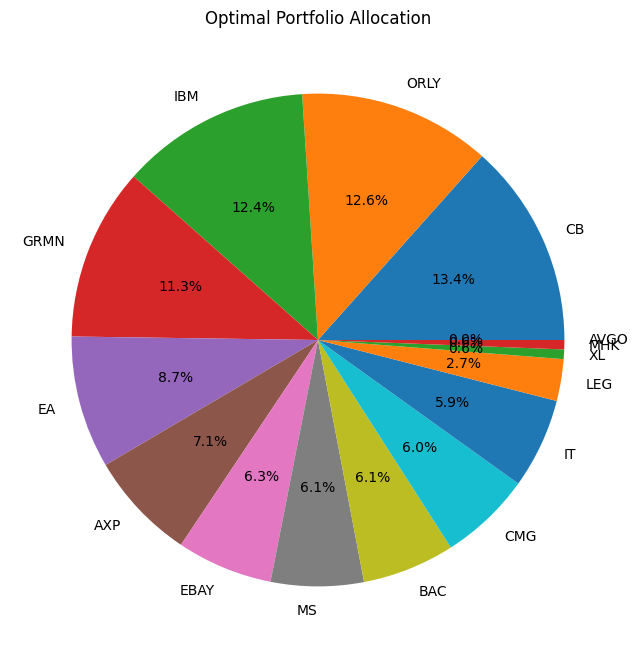

Train set: 2015-06-16 → 2024-06-11 (2263 rows)
Validation set: 2024-06-12 → 2024-12-11 (127 rows)
Test set: 2024-12-12 → 2025-06-12 (124 rows)
Training set length: 2263
Test set length: 124
Data inizio: 2015-06-16 00:00:00
Data fine: 2025-06-12 00:00:00
Len returns_df: 2514
Len returns_train: 2263
Len returns_test: 124

--- Portfolio Sensitivity to Parameter Noise ---
LEG: Original=0.5732, Perturbed=0.5085, Δ=0.0647
XL: Original=0.4268, Perturbed=0.1598, Δ=0.2670
RISK_FREE: Original=0.0000, Perturbed=0.3317, Δ=0.3317


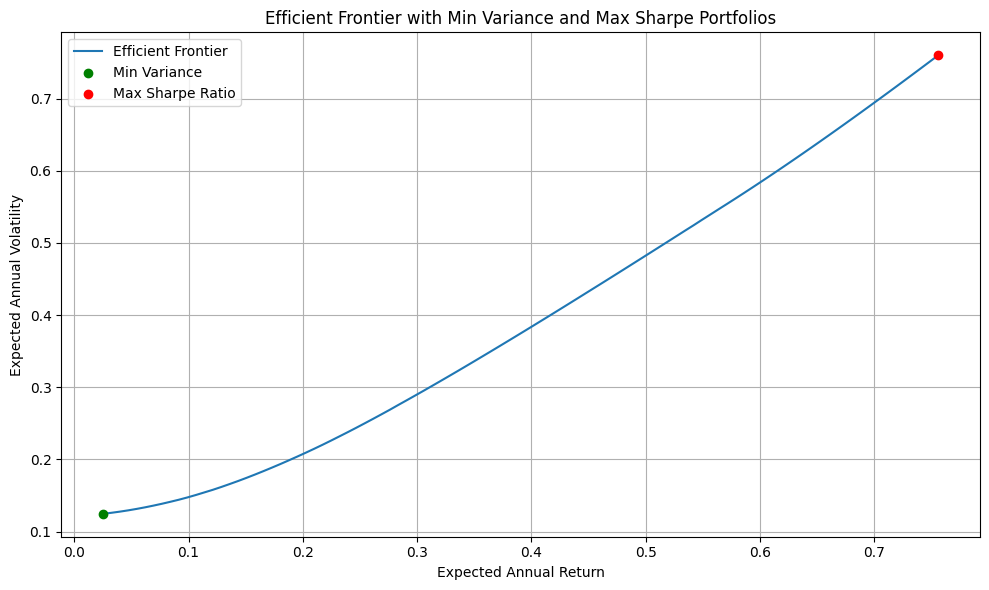


--- Minimum Variance Portfolio Weights ---
CMG: 0.0340
MHK: 0.0074
GRMN: 0.0249
LEG: 0.0533
ORLY: 0.0331
XL: 0.0155
CB: 0.0630
IBM: 0.0898
EBAY: 0.0457
EA: 0.0750
RISK_FREE: 0.5583

--- Maximum Sharpe Ratio Portfolio Weights ---
LEG: 0.5732
XL: 0.4268

--- Tangency Portfolio (Max Sharpe) ---
Expected Return: 0.7560
Volatility:      0.7602
Sharpe Ratio:    -0.4636
Weights:
  LEG: 0.5732
  XL: 0.4268

Expected Shortfall (95% CVaR):
 - Min Variance Portfolio: 0.0104
 - Max Sharpe Portfolio:   0.0880

Diversification Metrics:
 - Min Variance Portfolio: Entropy = 1.6284, Herfindahl = 0.3374
 - Max Sharpe Portfolio:   Entropy = 0.6824, Herfindahl = 0.5107

--- Risk Contributions (as % of total volatility) ---
Min Variance Portfolio:
RISK_FREE: 55.67%

Max Sharpe Portfolio:
LEG: 8.75%
XL: 91.25%


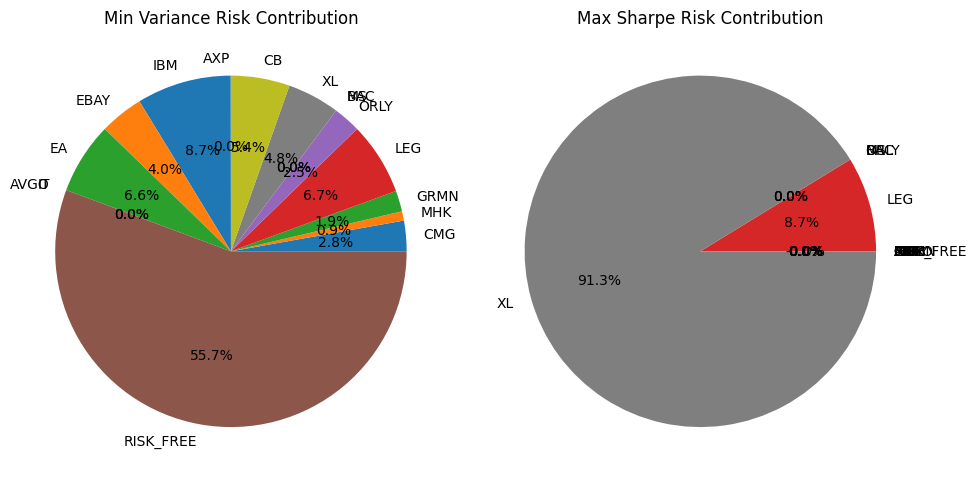


Performance Metrics (Downside Risk Adjusted):
 - Min Variance Portfolio: Sortino = 0.0335, Calmar = 0.1274
 - Max Sharpe Portfolio:   Sortino = 0.1025, Calmar = 1.2290


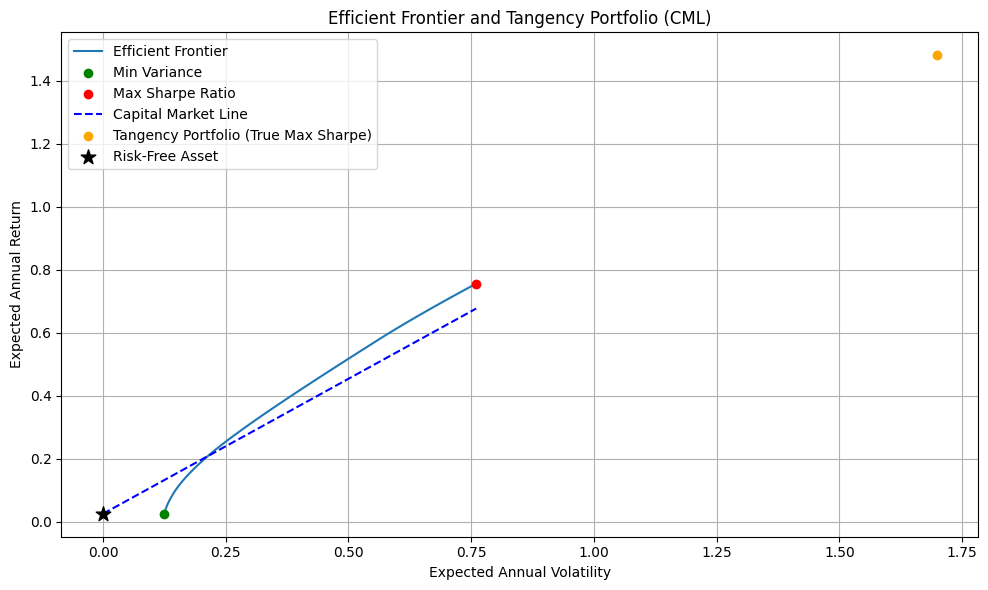


--- Tangency Portfolio (True Max Sharpe) ---
Expected Return: 1.4812
Volatility:      1.6984
Sharpe Ratio:    0.8573
Weights (including RISK_FREE):
  XL: 1.0000

Portfolio weights saved to CSV files:
- final_portfolio.csv (Equal Sector Allocation)
- min_variance_portfolio.csv (Minimum Variance Portfolio)
- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)

=== Out-of-Sample Performance (Last 6 Months) ===

Max Sharpe Portfolio (Test Set):
  Return:    0.9611
  Volatility:0.6064
  Sharpe:    1.5434
  Sortino:   0.1470
  Calmar:    4.3989
  CVaR 5%:   0.0808

Min Var Portfolio (Test Set):
  Return:    0.0696
  Volatility:0.0947
  Sharpe:    0.4686
  Sortino:   0.0676
  Calmar:    1.1382
  CVaR 5%:   0.0128


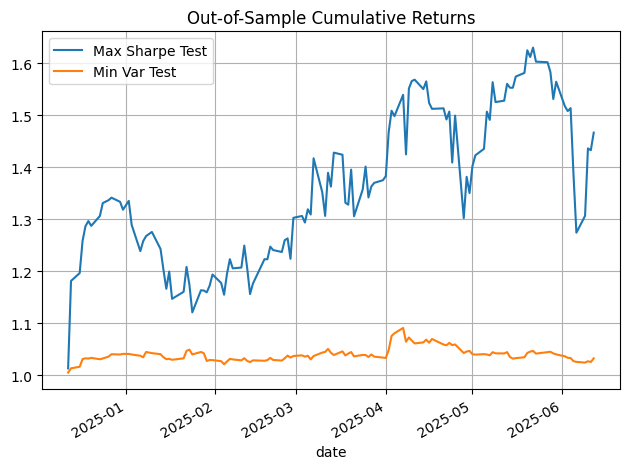

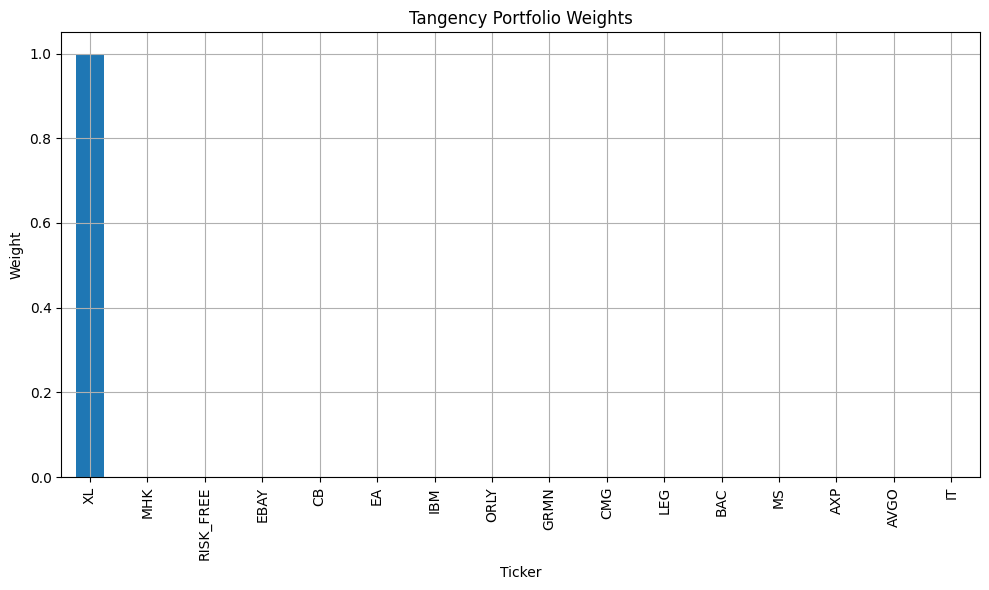

In [19]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# Ledoit-Wolf Shrinkage Estimator
def expected_shortfall(returns, alpha=0.05):
    """
    Computes Expected Shortfall (CVaR) at given confidence level alpha.
    Assumes returns is a 1D NumPy array.
    """
    sorted_returns = np.sort(returns)
    cutoff_index = int(np.ceil(alpha * len(sorted_returns)))
    return -np.mean(sorted_returns[:cutoff_index])

# Entropy and Herfindahl Index
def entropy(weights):
    """Shannon entropy of portfolio weights."""
    weights = np.array(weights)
    return -np.sum(weights * np.log(weights + 1e-10))  # avoid log(0)

def herfindahl(weights):
    """Herfindahl-Hirschman Index (HHI), a concentration measure."""
    weights = np.array(weights)
    return np.sum(weights**2)

# Risk Contribution Function
def risk_contributions(weights, cov_matrix):
    """
    Compute the risk contribution of each asset to total portfolio volatility.
    """
    weights = np.array(weights)
    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    mrc = (cov_matrix @ weights) / port_vol  # marginal risk contribution
    rc = weights * mrc  # total risk contribution per asset
    return rc, port_vol

# Sortino & Calmar Ratios
def sortino_ratio(returns, target=0):
    """Sortino ratio using downside standard deviation."""
    downside = returns[returns < target]
    downside_std = np.std(downside) if len(downside) > 0 else 1e-6
    return (returns.mean() - target) / downside_std

def calmar_ratio(returns):
    """Calmar ratio = return / max drawdown (uses cumulative returns)."""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    annual_return = returns.mean() * 252
    return annual_return / abs(max_drawdown) if max_drawdown < 0 else np.nan

np.random.seed(42)

# Perturbation Function
def perturb_parameters(mu, cov, k_mu=0.1, k_cov=0.1):
    """Apply noise to mean vector and covariance matrix."""
    mu_perturbed = mu * (1 + np.random.normal(0, k_mu, size=mu.shape))
    noise = np.random.normal(0, k_cov, size=cov.shape)
    cov_perturbed = cov + (cov * noise)
    cov_perturbed = (cov_perturbed + cov_perturbed.T) / 2  # ensure symmetry
    return mu_perturbed, cov_perturbed

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        # print(f"Loading: {filepath}")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    # Use Ledoit-Wolf shrinkage
    lw = LedoitWolf().fit(returns)
    cov = lw.covariance_ * 252  # <-- Annualized like before

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Combine all sector returns and add synthetic risk-free asset ===
returns_df = pd.concat(sector_returns.values(), axis=1).dropna()

# --- Aggiungiamo asset risk-free ---
risk_free_rate_daily = 0.0001
risk_free = pd.Series(risk_free_rate_daily, index=returns_df.index, name='RISK_FREE')
returns_df = pd.concat([returns_df, risk_free], axis=1)

risk_free_rate_annual = risk_free_rate_daily * 252

returns_df = returns_df.sort_index()
end_date = returns_df.index.max()

test_start = end_date - pd.DateOffset(months=6)
val_start = end_date - pd.DateOffset(months=12)

# Calcolo della data limite per lo split (3 mesi dalla fine)
returns_train = returns_df[returns_df.index < val_start]
returns_val = returns_df[(returns_df.index >= val_start) & (returns_df.index < test_start)]
returns_test = returns_df[returns_df.index >= test_start]
returns_modeling = pd.concat([returns_train, returns_val]).sort_index()

# Safety check
if len(returns_train) == 0 or len(returns_test) == 0:
    raise ValueError("Controlla che i dati coprano almeno 3 mesi!")

print("Train set:", returns_train.index.min().date(), "→", returns_train.index.max().date(), f"({len(returns_train)} rows)")
print("Validation set:", returns_val.index.min().date(), "→", returns_val.index.max().date(), f"({len(returns_val)} rows)")
print("Test set:", returns_test.index.min().date(), "→", returns_test.index.max().date(), f"({len(returns_test)} rows)")

# Debug info
print("Training set length:", len(returns_train))
print("Test set length:", len(returns_test))

print("Data inizio:", returns_df.index[0])
print("Data fine:", returns_df.index[-1])
print("Len returns_df:", len(returns_df))
print("Len returns_train:", len(returns_train))
print("Len returns_test:", len(returns_test))


# Controllo
if len(returns_train) == 0 or len(returns_test) == 0:
    raise ValueError("Controlla che i dati coprano almeno 3 mesi!")

symbols = returns_df.columns
mean_returns = returns_modeling.mean()
lw = LedoitWolf().fit(returns_modeling)
cov_matrix = lw.covariance_

n_assets = len(symbols)

# Compute Ledoit-Wolf shrinkage covariance matrix
n_assets = len(symbols)

rf = risk_free_rate_daily * 252  # annualizzato

# === Calcola il vero portafoglio Max Sharpe (tangente alla CML) ===
def negative_sharpe(weights, mu, cov, rf=0.0):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(weights.T @ cov @ weights)
    return - (port_return - rf) / port_vol

bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(negative_sharpe, initial_guess,
                  args=(mean_returns, cov_matrix, rf),
                  method='SLSQP', bounds=bounds, constraints=constraints)

tangent_weights = result.x
tangent_return = np.dot(tangent_weights, mean_returns) * 252
tangent_vol = np.sqrt(tangent_weights.T @ cov_matrix @ tangent_weights) * np.sqrt(252)
tangent_sharpe = (tangent_return - rf) / tangent_vol

# Generate efficient frontier
efficient_returns = []
efficient_risks = []
efficient_weights = []

for target_return in np.linspace(0.0001, 0.003, 100):
    def portfolio_stats(weights):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)

annual_returns = [r * 252 for r in efficient_returns[:len(efficient_risks)]]
annual_vols = [v * np.sqrt(252) for v in efficient_risks]

# --- Risk-free rate (you can change this if needed) ---
rf = risk_free_rate_annual

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Simulate perturbation ---
mu_pert, cov_pert = perturb_parameters(mean_returns, cov_matrix, k_mu=0.1, k_cov=0.1)

# --- Re-optimize max Sharpe portfolio using perturbed parameters ---
def neg_sharpe(weights):
    port_return = np.dot(weights, mu_pert)
    port_vol = np.sqrt(weights.T @ cov_pert @ weights)
    return - (port_return / port_vol)

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(n_assets))
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
perturbed_weights = result.x

# --- Compare original vs perturbed ---
print("\n--- Portfolio Sensitivity to Parameter Noise ---")
diff = np.abs(max_sharpe_weights - perturbed_weights)
for sym, w_orig, w_new, d in zip(symbols, max_sharpe_weights, perturbed_weights, diff):
    if d > 0.01:
        print(f"{sym}: Original={w_orig:.4f}, Perturbed={w_new:.4f}, Δ={d:.4f}")


# --- Plot with annotations ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in efficient_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], 
         label='Efficient Frontier')

# Mark key points
plt.scatter(efficient_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252),
            color='green', label='Min Variance', zorder=5)
plt.scatter(efficient_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252),
            color='red', label='Max Sharpe Ratio', zorder=5)

plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Tangency Portfolio (Max Sharpe) ---")
print(f"Expected Return: {annual_returns[max_sharpe_idx]:.4f}")
print(f"Volatility:      {annual_vols[max_sharpe_idx]:.4f}")
print(f"Sharpe Ratio:    {sharpe_ratios[max_sharpe_idx]:.4f}")
print("Weights:")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")

# Compute Expected Shortfall for Your Optimal Portfolios
# Compute portfolio returns
def compute_portfolio_returns(weights, returns_df):
    return returns_df @ weights

# Portfolio return series
min_var_port_returns = compute_portfolio_returns(min_var_weights, returns_df)
max_sharpe_port_returns = compute_portfolio_returns(max_sharpe_weights, returns_df)

# Expected Shortfall (CVaR) at 5% level
es_min_var = expected_shortfall(min_var_port_returns.values, alpha=0.05)
es_max_sharpe = expected_shortfall(max_sharpe_port_returns.values, alpha=0.05)

print(f"\nExpected Shortfall (95% CVaR):")
print(f" - Min Variance Portfolio: {es_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   {es_max_sharpe:.4f}")

# Diversification metrics
ent_min_var = entropy(min_var_weights)
ent_max_sharpe = entropy(max_sharpe_weights)

herf_min_var = herfindahl(min_var_weights)
herf_max_sharpe = herfindahl(max_sharpe_weights)

#E ntropy ↑ → More diversified
# Herfindahl ↓ → More diversified

print(f"\nDiversification Metrics:")
print(f" - Min Variance Portfolio: Entropy = {ent_min_var:.4f}, Herfindahl = {herf_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Entropy = {ent_max_sharpe:.4f}, Herfindahl = {herf_max_sharpe:.4f}")

# Risk Contributions
rc_min_var, vol_min_var = risk_contributions(min_var_weights, cov_matrix)
rc_max_sharpe, vol_max_sharpe = risk_contributions(max_sharpe_weights, cov_matrix)

print("\n--- Risk Contributions (as % of total volatility) ---")
print("Min Variance Portfolio:")
for sym, rc in zip(symbols, rc_min_var):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_min_var) * 100:.2f}%")

print("\nMax Sharpe Portfolio:")
for sym, rc in zip(symbols, rc_max_sharpe):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_max_sharpe) * 100:.2f}%")

# Pie chart of risk contributions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(rc_min_var, labels=symbols, autopct='%1.1f%%')
plt.title('Min Variance Risk Contribution')

plt.subplot(1, 2, 2)
plt.pie(rc_max_sharpe, labels=symbols, autopct='%1.1f%%')
plt.title('Max Sharpe Risk Contribution')

plt.tight_layout()
plt.show()

# Sortino Ratios
sortino_min_var = sortino_ratio(min_var_port_returns)
sortino_max_sharpe = sortino_ratio(max_sharpe_port_returns)

# Calmar Ratios
calmar_min_var = calmar_ratio(min_var_port_returns)
calmar_max_sharpe = calmar_ratio(max_sharpe_port_returns)

# Display
print(f"\nPerformance Metrics (Downside Risk Adjusted):")
print(f" - Min Variance Portfolio: Sortino = {sortino_min_var:.4f}, Calmar = {calmar_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Sortino = {sortino_max_sharpe:.4f}, Calmar = {calmar_max_sharpe:.4f}")

# --- Plot with annotations and Capital Market Line (CML) ---
plt.figure(figsize=(10, 6))

plt.plot(annual_vols, annual_returns, label='Efficient Frontier')

# Mark key points
plt.scatter(annual_vols[min_var_idx], annual_returns[min_var_idx],
            color='green', label='Min Variance', zorder=5)
plt.scatter(annual_vols[max_sharpe_idx], annual_returns[max_sharpe_idx],
            color='red', label='Max Sharpe Ratio', zorder=5)

# Add Capital Market Line (CML) - FIXED
slope = tangent_sharpe
cml_volatility = np.linspace(0, max(annual_vols), 100)
cml_return = risk_free_rate_annual + slope * cml_volatility
plt.plot(cml_volatility, cml_return, linestyle='--', color='blue', label='Capital Market Line')
plt.scatter(tangent_vol, tangent_return,
            color='orange', label='Tangency Portfolio (True Max Sharpe)', zorder=5)

# Add risk-free point
plt.scatter(0, risk_free_rate_annual, color='black', marker='*', s=120, label='Risk-Free Asset', zorder=5)

plt.xlabel('Expected Annual Volatility')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier and Tangency Portfolio (CML)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Tangency Portfolio (True Max Sharpe) ---")
print(f"Expected Return: {tangent_return:.4f}")
print(f"Volatility:      {tangent_vol:.4f}")
print(f"Sharpe Ratio:    {tangent_sharpe:.4f}")
print("Weights (including RISK_FREE):")
for sym, w in zip(symbols, tangent_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")

final_portfolio.to_csv("final_portfolio.csv", index=False)
# Save portfolio weights to CSV files
min_var_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': min_var_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

max_sharpe_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': max_sharpe_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

min_var_portfolio.to_csv("min_variance_portfolio.csv", index=False)
max_sharpe_portfolio.to_csv("max_sharpe_portfolio.csv", index=False)

print("\nPortfolio weights saved to CSV files:")
print("- final_portfolio.csv (Equal Sector Allocation)")
print("- min_variance_portfolio.csv (Minimum Variance Portfolio)")
print("- max_sharpe_portfolio.csv (Maximum Sharpe Ratio Portfolio)")

# === STEP X: Test performance out-of-sample ===
print("\n=== Out-of-Sample Performance (Last 6 Months) ===")
max_sharpe_test = returns_test @ max_sharpe_weights
min_var_test = returns_test @ min_var_weights

def evaluate_returns(r):
    annual_return = r.mean() * 252
    volatility = r.std() * np.sqrt(252)
    sharpe = (annual_return - risk_free_rate_annual) / volatility
    sortino = sortino_ratio(r)
    calmar = calmar_ratio(r)
    es = expected_shortfall(r.values, alpha=0.05)
    return annual_return, volatility, sharpe, sortino, calmar, es

metrics_sharpe = evaluate_returns(max_sharpe_test)
metrics_minvar = evaluate_returns(min_var_test)

print(f"\nMax Sharpe Portfolio (Test Set):")
print(f"  Return:    {metrics_sharpe[0]:.4f}")
print(f"  Volatility:{metrics_sharpe[1]:.4f}")
print(f"  Sharpe:    {metrics_sharpe[2]:.4f}")
print(f"  Sortino:   {metrics_sharpe[3]:.4f}")
print(f"  Calmar:    {metrics_sharpe[4]:.4f}")
print(f"  CVaR 5%:   {metrics_sharpe[5]:.4f}")

print(f"\nMin Var Portfolio (Test Set):")
print(f"  Return:    {metrics_minvar[0]:.4f}")
print(f"  Volatility:{metrics_minvar[1]:.4f}")
print(f"  Sharpe:    {metrics_minvar[2]:.4f}")
print(f"  Sortino:   {metrics_minvar[3]:.4f}")
print(f"  Calmar:    {metrics_minvar[4]:.4f}")
print(f"  CVaR 5%:   {metrics_minvar[5]:.4f}")

# Visualizzazione cumulativa out-of-sample
(1 + max_sharpe_test).cumprod().plot(label='Max Sharpe Test')
(1 + min_var_test).cumprod().plot(label='Min Var Test')
plt.title('Out-of-Sample Cumulative Returns')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

modeling_weights_df = pd.DataFrame({
    'Ticker': symbols,
    'Weight': max_sharpe_weights
})
modeling_weights_df.to_csv("modeling_max_sharpe_portfolio.csv", index=False)

tangency_portfolio = pd.DataFrame({
    'Ticker': symbols,
    'Weight': tangent_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

tangency_portfolio.to_csv("tangency_portfolio.csv", index=False)

fig, ax = plt.subplots(figsize=(10, 6))
tangency_portfolio.plot(kind='bar', x='Ticker', y='Weight', legend=False, ax=ax)
plt.title('Tangency Portfolio Weights')
plt.ylabel('Weight')
plt.grid(True)
plt.tight_layout()
plt.show()



In [16]:
print("Test set:", returns_test.index.min().date(), "→", returns_test.index.max().date(), f"({len(returns_test)} rows)")


Test set: 2024-12-12 → 2025-06-12 (124 rows)


## Ruined Version

Final Portfolio Allocation (Equal Sector Allocation):
   Ticker    Weight
0      CB  0.133968
1    ORLY  0.126341
2     IBM  0.123325
3    GRMN  0.113193
4      EA  0.086249
5     AXP  0.071471
6    EBAY  0.062415
7      MS  0.060886
8     BAC  0.060725
9     CMG  0.060363
10     IT  0.058011
11    LEG  0.027287
12     XL  0.006284
13    MHK  0.006150
14   AVGO  0.003333


C:\Users\longo\AppData\Local\Temp\ipykernel_26940\2472105652.py:110: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}
c:\Users\longo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_slsqp_py.py:437: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
c:\Users\longo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_slsqp_py.py:441: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
c:\Users\longo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_slsqp_py.py:495: RuntimeWarning: Values in x were

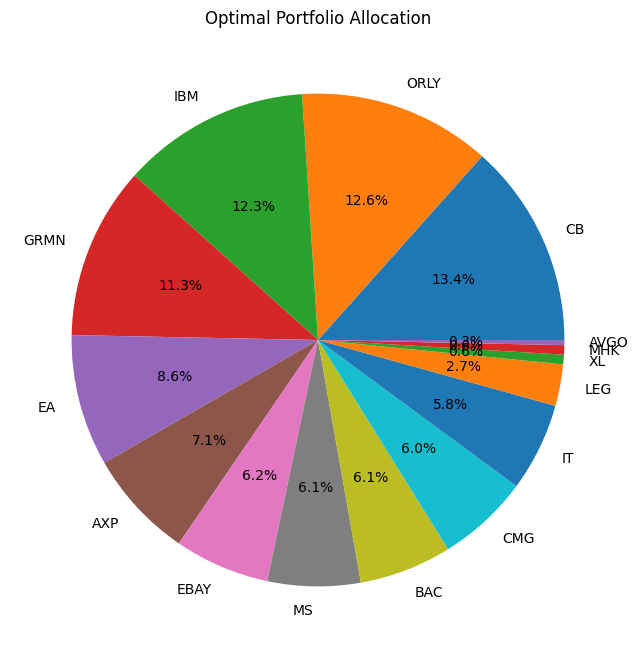


[DEBUG] Osservazioni per titolo:
CMG     2514
MHK     2514
GRMN    2514
LEG     2514
ORLY    2514
BAC     2514
MS      2514
XL      2514
CB      2514
AXP     2514
IBM     2514
EBAY    2514
EA      2514
AVGO    2514
IT      2514
dtype: int64

--- Portfolio Sensitivity to Parameter Noise ---
MHK: Original=0.1249, Perturbed=0.0000, Δ=0.1249
LEG: Original=0.5920, Perturbed=0.7636, Δ=0.1716
XL: Original=0.1668, Perturbed=0.2364, Δ=0.0696
IBM: Original=0.0255, Perturbed=0.0000, Δ=0.0255
EA: Original=0.0908, Perturbed=0.0000, Δ=0.0908

--- Minimum Variance Portfolio Weights ---
CMG: 0.0768
MHK: 0.0122
GRMN: 0.0660
LEG: 0.1156
ORLY: 0.0892
XL: 0.0324
CB: 0.1470
IBM: 0.1680
EBAY: 0.0980
EA: 0.1803
IT: 0.0145

--- Maximum Sharpe Ratio Portfolio Weights ---
MHK: 0.1249
LEG: 0.5920
XL: 0.1668
IBM: 0.0255
EA: 0.0908

--- Tangency Portfolio (Max Sharpe) ---
Expected Return: 0.4000
Volatility:      0.0249
Sharpe Ratio:    16.0324
Weights:
  MHK: 0.1249
  LEG: 0.5920
  XL: 0.1668
  IBM: 0.0255
  EA: 

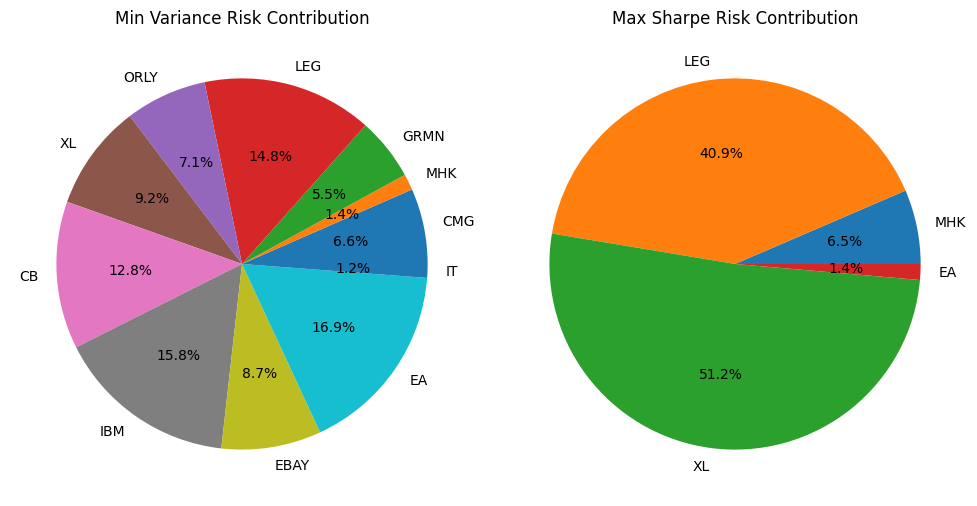


Performance Metrics (Downside Risk Adjusted):
 - Min Variance Portfolio: Sortino = 0.0109, Calmar = 0.0437
 - Max Sharpe Portfolio:   Sortino = 0.1052, Calmar = 0.6986


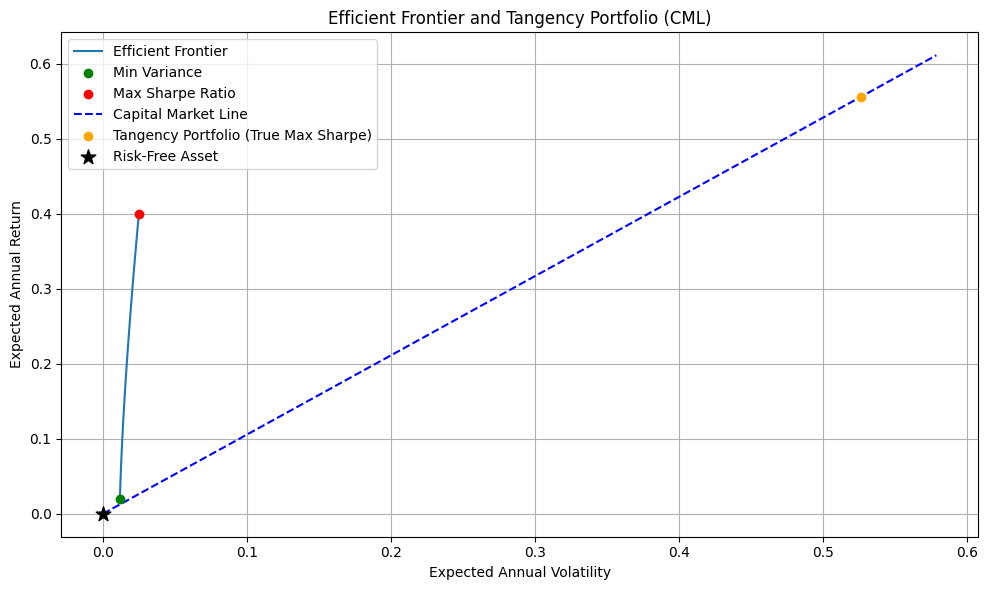


--- Tangency Portfolio (True Max Sharpe) ---
Expected Return: 0.5555
Volatility:      0.5259
Sharpe Ratio:    1.0562
Weights:
  MHK: 0.0259
  LEG: 0.7150
  XL: 0.2592


In [2]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.covariance import LedoitWolf

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# Ledoit-Wolf Shrinkage Estimator
def expected_shortfall(returns, alpha=0.05):
    """
    Computes Expected Shortfall (CVaR) at given confidence level alpha.
    Assumes returns is a 1D NumPy array.
    """
    sorted_returns = np.sort(returns)
    cutoff_index = int(np.ceil(alpha * len(sorted_returns)))
    return -np.mean(sorted_returns[:cutoff_index])

# Entropy and Herfindahl Index
def entropy(weights):
    """Shannon entropy of portfolio weights."""
    weights = np.array(weights)
    return -np.sum(weights * np.log(weights + 1e-10))  # avoid log(0)

def herfindahl(weights):
    """Herfindahl-Hirschman Index (HHI), a concentration measure."""
    weights = np.array(weights)
    return np.sum(weights**2)

# Risk Contribution Function
def risk_contributions(weights, cov_matrix):
    """
    Compute the risk contribution of each asset to total portfolio volatility.
    """
    weights = np.array(weights)
    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    mrc = (cov_matrix @ weights) / port_vol  # marginal risk contribution
    rc = weights * mrc  # total risk contribution per asset
    return rc, port_vol

# Sortino & Calmar Ratios
def sortino_ratio(returns, target=0):
    """Sortino ratio using downside standard deviation."""
    downside = returns[returns < target]
    downside_std = np.std(downside) if len(downside) > 0 else 1e-6
    return (returns.mean() - target) / downside_std

def calmar_ratio(returns):
    """Calmar ratio = return / max drawdown (uses cumulative returns)."""
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()
    annual_return = returns.mean() * 252
    return annual_return / abs(max_drawdown) if max_drawdown < 0 else np.nan

np.random.seed(42)

rf_rate = 0.0  # Risk-free rate costante

# Perturbation Function
def perturb_parameters(mu, cov, k_mu=0.1, k_cov=0.1):
    """Apply noise to mean vector and covariance matrix."""
    mu_perturbed = mu * (1 + np.random.normal(0, k_mu, size=mu.shape))
    noise = np.random.normal(0, k_cov, size=cov.shape)
    cov_perturbed = cov + (cov * noise)
    cov_perturbed = (cov_perturbed + cov_perturbed.T) / 2  # ensure symmetry
    return mu_perturbed, cov_perturbed

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        # print(f"Loading: {filepath}")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    # Use Ledoit-Wolf shrinkage
    lw = LedoitWolf().fit(returns)
    cov = lw.covariance_ * 252  # <-- Annualized like before

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0.01, 1) for _ in range(n))  # almeno 1% per ogni titolo
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

def filter_contributions(symbols, rc_vector, threshold=0.005):
    """Filtra simboli con contributi troppo piccoli."""
    return zip(*[(s, rc) for s, rc in zip(symbols, rc_vector) if rc / sum(rc_vector) > threshold])

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Efficient Frontier and Sharpe Ratio Analysis ===
# Trova l'intervallo comune a tutti i settori
common_dates = set.intersection(*(set(data.index) for data in sector_returns.values()))
returns_df = pd.concat([df.loc[sorted(common_dates)] for df in sector_returns.values()], axis=1)

# Filtro: tieni solo i titoli con almeno 250 giorni di dati (circa 1 anno di trading)
min_days_required = 250
returns_df = returns_df.loc[:, returns_df.count() >= min_days_required]

# Drop finale dei NaN rimasti
returns_df.dropna(inplace=True)

# Debug utile (puoi toglierlo dopo)
print("\n[DEBUG] Osservazioni per titolo:")
print(returns_df.count().sort_values())

symbols = returns_df.columns
mean_returns = returns_df.mean() * 252

# Filtro dei rendimenti annualizzati troppo estremi (> 40% annuo)
# mean_returns = mean_returns.clip(upper=0.4)


# Compute Ledoit-Wolf shrinkage covariance matrix
lw = LedoitWolf().fit(returns_df)
cov_matrix = lw.covariance_
n_assets = len(symbols)

# === Calcola il vero portafoglio Max Sharpe (tangente alla CML) ===
def negative_sharpe(weights, mu, cov, rf):
    port_return = np.dot(weights, mu)
    port_vol = np.sqrt(weights.T @ cov @ weights)
    return - (port_return - rf) / port_vol

bounds = tuple((0, 1) for _ in range(n_assets))
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(negative_sharpe, initial_guess,
                  args=(mean_returns, cov_matrix, rf_rate),
                  method='SLSQP', bounds=bounds, constraints=constraints)

tangent_weights = result.x
tangent_return = np.dot(tangent_weights, mean_returns)  
tangent_vol = np.sqrt(tangent_weights.T @ cov_matrix @ tangent_weights) * np.sqrt(252)
tangent_sharpe = (tangent_return - rf_rate) / tangent_vol

# Generate efficient frontier
efficient_risks = []
efficient_weights = []
efficient_returns = []

for target_return in np.linspace(0.02, 0.4, 100):
    def portfolio_stats(weights):
        port_return = np.dot(weights, mean_returns)
        port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)
    else:
        print(f"Optimization failed for target return {target_return:.4f}")

efficient_returns = [np.dot(w, mean_returns) for w in efficient_weights]

annual_returns = [np.dot(w, mean_returns) for w in efficient_weights]
annual_vols = [np.sqrt(np.dot(np.dot(w.T, cov_matrix), w)) for w in efficient_weights]

# --- Calculate Sharpe Ratios along the frontier ---
sharpe_ratios = [(r - rf_rate) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

# --- Extract key portfolios ---
max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Simulate perturbation ---
mu_pert, cov_pert = perturb_parameters(mean_returns, cov_matrix, k_mu=0.1, k_cov=0.1)

# --- Re-optimize max Sharpe portfolio using perturbed parameters ---
def neg_sharpe(weights):
    port_return = np.dot(weights, mu_pert)
    port_vol = np.sqrt(weights.T @ cov_pert @ weights)
    return - (port_return / port_vol)

constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
bounds = tuple((0, 1) for _ in range(n_assets))
initial_guess = np.repeat(1 / n_assets, n_assets)

result = minimize(neg_sharpe, initial_guess, bounds=bounds, constraints=constraints)
perturbed_weights = result.x

# --- Compare original vs perturbed ---
print("\n--- Portfolio Sensitivity to Parameter Noise ---")
diff = np.abs(max_sharpe_weights - perturbed_weights)
for sym, w_orig, w_new, d in zip(symbols, max_sharpe_weights, perturbed_weights, diff):
    if d > 0.01:
        print(f"{sym}: Original={w_orig:.4f}, Perturbed={w_new:.4f}, Δ={d:.4f}")

# --- Display portfolio weights for both portfolios ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Tangency Portfolio (Max Sharpe) ---")
print(f"Expected Return: {annual_returns[max_sharpe_idx]:.4f}")
print(f"Volatility:      {annual_vols[max_sharpe_idx]:.4f}")
print(f"Sharpe Ratio:    {sharpe_ratios[max_sharpe_idx]:.4f}")
print("Weights:")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")

# Compute Expected Shortfall for Your Optimal Portfolios
# Compute portfolio returns
def compute_portfolio_returns(weights, returns_df):
    return returns_df @ weights

# Portfolio return series
min_var_port_returns = compute_portfolio_returns(min_var_weights, returns_df)
max_sharpe_port_returns = compute_portfolio_returns(max_sharpe_weights, returns_df)

# Expected Shortfall (CVaR) at 5% level
es_min_var = expected_shortfall(min_var_port_returns.values, alpha=0.05)
es_max_sharpe = expected_shortfall(max_sharpe_port_returns.values, alpha=0.05)

print(f"\nExpected Shortfall (95% CVaR):")
print(f" - Min Variance Portfolio: {es_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   {es_max_sharpe:.4f}")

# Diversification metrics
ent_min_var = entropy(min_var_weights)
ent_max_sharpe = entropy(max_sharpe_weights)

herf_min_var = herfindahl(min_var_weights)
herf_max_sharpe = herfindahl(max_sharpe_weights)

#E ntropy ↑ → More diversified
# Herfindahl ↓ → More diversified

print(f"\nDiversification Metrics:")
print(f" - Min Variance Portfolio: Entropy = {ent_min_var:.4f}, Herfindahl = {herf_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Entropy = {ent_max_sharpe:.4f}, Herfindahl = {herf_max_sharpe:.4f}")

# Risk Contributions
rc_min_var, vol_min_var = risk_contributions(min_var_weights, cov_matrix)
rc_max_sharpe, vol_max_sharpe = risk_contributions(max_sharpe_weights, cov_matrix)

print("\n--- Risk Contributions (as % of total volatility) ---")
print("Min Variance Portfolio:")
for sym, rc in zip(symbols, rc_min_var):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_min_var) * 100:.2f}%")

print("\nMax Sharpe Portfolio:")
for sym, rc in zip(symbols, rc_max_sharpe):
    if rc > 0.001:
        print(f"{sym}: {(rc / vol_max_sharpe) * 100:.2f}%")

# Pie chart of risk contributions
symbols_min, rc_min = filter_contributions(symbols, rc_min_var)
symbols_max, rc_max = filter_contributions(symbols, rc_max_sharpe)

# Grafico pie chart
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(rc_min, labels=symbols_min, autopct='%1.1f%%')
plt.title('Min Variance Risk Contribution')

plt.subplot(1, 2, 2)
plt.pie(rc_max, labels=symbols_max, autopct='%1.1f%%')
plt.title('Max Sharpe Risk Contribution')

plt.tight_layout()
plt.show()


# Sortino Ratios
sortino_min_var = sortino_ratio(min_var_port_returns)
sortino_max_sharpe = sortino_ratio(max_sharpe_port_returns)

# Calmar Ratios
calmar_min_var = calmar_ratio(min_var_port_returns)
calmar_max_sharpe = calmar_ratio(max_sharpe_port_returns)

# Display
print(f"\nPerformance Metrics (Downside Risk Adjusted):")
print(f" - Min Variance Portfolio: Sortino = {sortino_min_var:.4f}, Calmar = {calmar_min_var:.4f}")
print(f" - Max Sharpe Portfolio:   Sortino = {sortino_max_sharpe:.4f}, Calmar = {calmar_max_sharpe:.4f}")

# --- Plot with annotations and Capital Market Line (CML) ---
plt.figure(figsize=(10, 6))

plt.plot(annual_vols, annual_returns, label='Efficient Frontier')

# Mark key points
plt.scatter(annual_vols[min_var_idx], annual_returns[min_var_idx],
            color='green', label='Min Variance', zorder=5)
plt.scatter(annual_vols[max_sharpe_idx], annual_returns[max_sharpe_idx],
            color='red', label='Max Sharpe Ratio', zorder=5)

# Add Capital Market Line (CML) - FIXED
slope = (tangent_return - rf_rate) / tangent_vol
cml_volatility = np.linspace(0, tangent_vol * 1.1, 100)
plt.plot(cml_volatility, rf_rate + tangent_sharpe * cml_volatility, linestyle='--', color='blue', label='Capital Market Line')
plt.scatter(tangent_vol, tangent_return,
            color='orange', label='Tangency Portfolio (True Max Sharpe)', zorder=5)

# Add risk-free point
plt.scatter(0, rf_rate, color='black', marker='*', s=120, label='Risk-Free Asset', zorder=5)

plt.xlabel('Expected Annual Volatility')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier and Tangency Portfolio (CML)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("\n--- Tangency Portfolio (True Max Sharpe) ---")
print(f"Expected Return: {tangent_return:.4f}")
print(f"Volatility:      {tangent_vol:.4f}")
print(f"Sharpe Ratio:    {tangent_sharpe:.4f}")
print("Weights:")
for sym, w in zip(symbols, tangent_weights):
    if w > 0.001:
        print(f"  {sym}: {w:.4f}")


final_portfolio.to_csv("final_portfolio.csv", index=False)

## Not so correct version need to be checked

Final Portfolio Allocation (Equal Sector Allocation):
   Ticker        Weight
0      CB  2.431552e-01
1    ORLY  1.291334e-01
2     IBM  1.261496e-01
3    GRMN  1.155412e-01
4      EA  8.694362e-02
5    EBAY  6.223687e-02
6     CMG  5.898239e-02
7      IT  5.800330e-02
8     AXP  4.580423e-02
9      MS  2.676775e-02
10    LEG  2.572117e-02
11    BAC  1.381512e-02
12    MHK  3.955149e-03
13     XL  3.791035e-03
14   AVGO  1.102272e-18


C:\Users\longo\AppData\Local\Temp\ipykernel_26940\580111486.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}


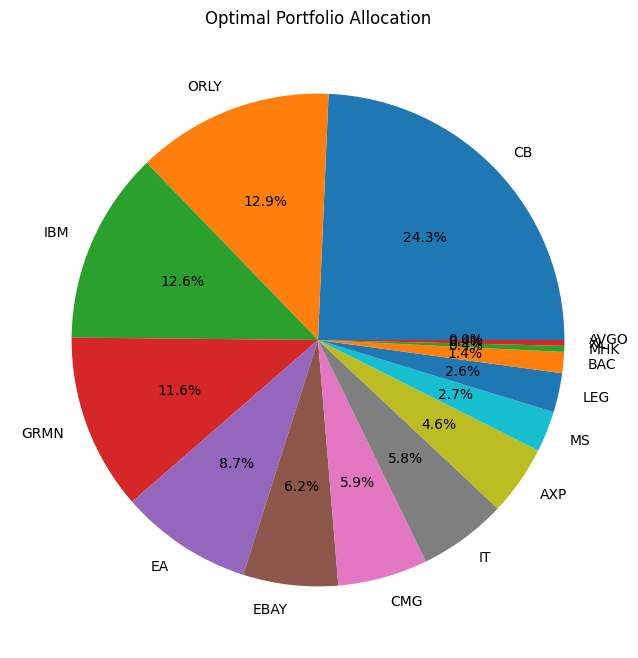

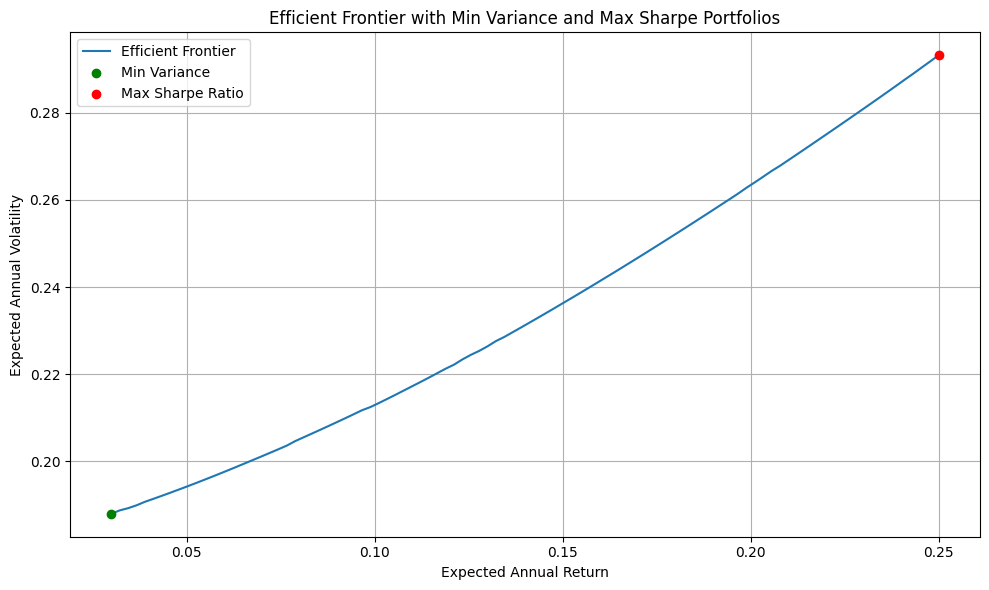


--- Minimum Variance Portfolio Weights ---
CMG: 0.0690
GRMN: 0.0358
LEG: 0.1285
ORLY: 0.0600
XL: 0.0337
CB: 0.1736
IBM: 0.2134
EBAY: 0.0818
EA: 0.2042

--- Maximum Sharpe Ratio Portfolio Weights ---
CMG: 0.0065
MHK: 0.0441
LEG: 0.4788
XL: 0.0976
IBM: 0.1567
EA: 0.2162

--- Analytical Tangent Portfolio ---
Expected Return: -0.0046
Volatility: 0.0447
Sharpe Ratio: -0.1021

Weights:
GRMN: 0.5190
ORLY: 0.8931
CB: 0.4958
AXP: 0.6722
EBAY: 0.2118
AVGO: 0.6458
IT: 0.2917


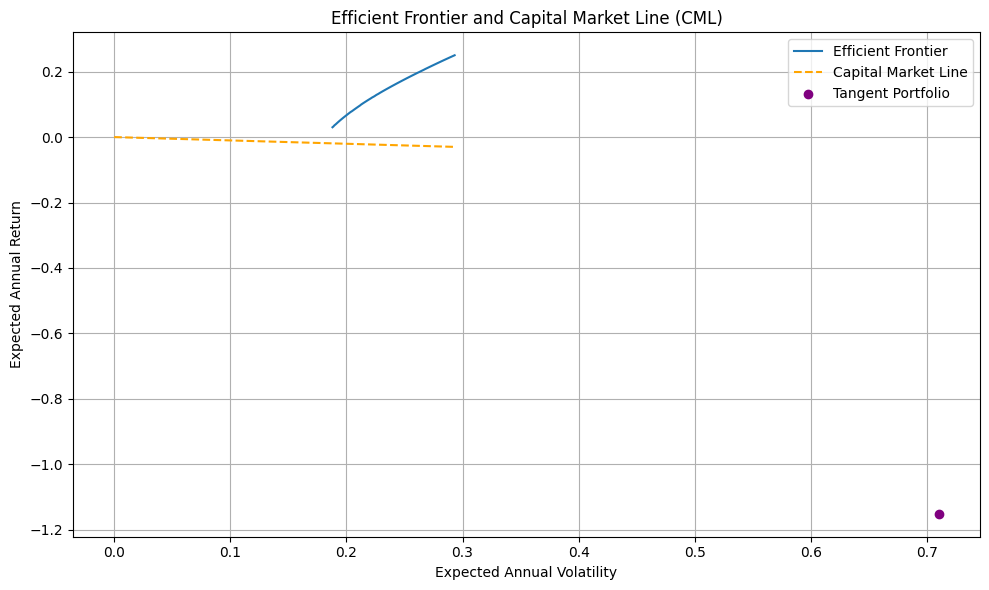

In [3]:
# Markowitz Optimal Portfolio with Sector-Based Equal Investment

import pandas as pd
import numpy as np
import os
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# === STEP 1: Load and clean company-sector mapping ===
df_companies = pd.read_csv("selected_company_sample.csv")
df_companies.rename(columns={'Symbol': 'Ticker'}, inplace=True)

sectors = df_companies['Sector'].unique()

# === STEP 2: Clean and load individual stock data ===
def clean_stock_data(filepath):
    df = pd.read_csv(filepath)
    df.columns = [col.strip().lower().replace('/', '_').replace(' ', '_') for col in df.columns]

    if 'close_last' in df.columns:
        df.rename(columns={'close_last': 'close'}, inplace=True)

    df['close'] = df['close'].replace('[\$,]', '', regex=True).astype(float)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    return df[['close']]

# === STEP 3: Load data by sector ===
def load_sector_data(tickers, folder='stocks'):
    data = pd.DataFrame()
    for ticker in tickers:
        filepath = os.path.join(folder, f"{ticker}.csv")
        try:
            stock_data = clean_stock_data(filepath)
            data[ticker] = stock_data['close']
        except Exception as e:
            print(f"Error loading {ticker}: {e}")
    return data

sector_data = {}
for sector in sectors:
    tickers = df_companies[df_companies['Sector'] == sector]['Ticker'].tolist()
    sector_data[sector] = load_sector_data(tickers)

# === STEP 4: Compute daily returns ===
sector_returns = {sector: data.pct_change().dropna() for sector, data in sector_data.items()}

# === STEP 5: Optimize portfolio within each sector ===
def get_optimal_weights(returns):
    n = returns.shape[1]

    def portfolio_volatility(weights):
        return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(n))
    initial_guess = np.array(n * [1. / n])

    result = minimize(portfolio_volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    return result.x

# === STEP 6: Combine sector portfolios equally ===
all_tickers = []
all_weights = []

for sector in sectors:
    returns = sector_returns[sector]
    tickers = returns.columns
    weights = get_optimal_weights(returns)
    scaled_weights = weights * (1 / len(sectors))

    all_tickers.extend(tickers)
    all_weights.extend(scaled_weights)

final_portfolio = pd.DataFrame({
    'Ticker': all_tickers,
    'Weight': all_weights
}).sort_values(by='Weight', ascending=False).reset_index(drop=True)

# === STEP 7: Display final portfolio ===
print("Final Portfolio Allocation (Equal Sector Allocation):")
print(final_portfolio)

# === Optional: Plot pie chart ===
plt.figure(figsize=(8, 8))
plt.pie(final_portfolio['Weight'], labels=final_portfolio['Ticker'], autopct='%1.1f%%')
plt.title('Optimal Portfolio Allocation')
plt.show()

# === STEP 8: Efficient Frontier and Sharpe Ratio Analysis ===
returns_df = pd.concat(sector_returns.values(), axis=1).dropna()
returns_df = returns_df.dropna(axis=1)  # Drop any column (stock) with remaining NaNs

symbols = returns_df.columns
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()
n_assets = len(symbols)

# Generate efficient frontier
efficient_returns = []
efficient_risks = []
efficient_weights = []

# Define target returns in annual terms and convert to daily
annual_targets = np.linspace(0.03, 0.25, 100)  # From 3% to 25% expected annual return
daily_targets = annual_targets / 252

for target_return in daily_targets:
    def portfolio_stats(weights):
        port_return = weights @ mean_returns
        port_volatility = np.sqrt(weights @ cov_matrix @ weights)

        return port_volatility

    constraints = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    )

    bounds = tuple((0, 1) for _ in range(n_assets))
    initial_guess = np.array(n_assets * [1. / n_assets])

    result = minimize(portfolio_stats, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
    if result.success:
        efficient_returns.append(target_return)
        efficient_risks.append(result.fun)
        efficient_weights.append(result.x)

# --- Risk-free rate ---
rf = 0.0
sharpe_ratios = [(r - rf) / v for r, v in zip(efficient_returns[:len(efficient_risks)], efficient_risks)]
max_sharpe_idx = np.argmax(sharpe_ratios)
min_var_idx = np.argmin(efficient_risks)

max_sharpe_weights = efficient_weights[max_sharpe_idx]
min_var_weights = efficient_weights[min_var_idx]

# --- Plot frontier with max Sharpe and min variance ---
plt.figure(figsize=(10, 6))
plt.plot([r * 252 for r in efficient_returns[:len(efficient_risks)]], 
         [v * np.sqrt(252) for v in efficient_risks], label='Efficient Frontier')
plt.scatter(efficient_returns[min_var_idx] * 252, efficient_risks[min_var_idx] * np.sqrt(252), color='green', label='Min Variance', zorder=5)
plt.scatter(efficient_returns[max_sharpe_idx] * 252, efficient_risks[max_sharpe_idx] * np.sqrt(252), color='red', label='Max Sharpe Ratio', zorder=5)
plt.xlabel('Expected Annual Return')
plt.ylabel('Expected Annual Volatility')
plt.title('Efficient Frontier with Min Variance and Max Sharpe Portfolios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Print weights ---
print("\n--- Minimum Variance Portfolio Weights ---")
for sym, w in zip(symbols, min_var_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

print("\n--- Maximum Sharpe Ratio Portfolio Weights ---")
for sym, w in zip(symbols, max_sharpe_weights):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

# === STEP 9: Analytical Tangent Portfolio ===
one_vec = np.ones(len(mean_returns))
a = mean_returns.T @ np.linalg.inv(cov_matrix) @ mean_returns
b = mean_returns.T @ np.linalg.inv(cov_matrix) @ one_vec
c = one_vec.T @ np.linalg.inv(cov_matrix) @ one_vec

# Tangency portfolio weights
xtg = np.linalg.inv(cov_matrix) @ (mean_returns - rf * one_vec)
xtg = xtg / np.sum(xtg)

expected_return_tg = mean_returns @ xtg
volatility_tg = np.sqrt(xtg.T @ cov_matrix @ xtg)
sharpe_tg = (expected_return_tg - rf) / volatility_tg

print("\n--- Analytical Tangent Portfolio ---")
print(f"Expected Return: {expected_return_tg:.4f}")
print(f"Volatility: {volatility_tg:.4f}")
print(f"Sharpe Ratio: {sharpe_tg:.4f}")
print("\nWeights:")
for sym, w in zip(symbols, xtg):
    if w > 0.001:
        print(f"{sym}: {w:.4f}")

# === STEP 10: Plot Capital Market Line (CML) ===
plt.figure(figsize=(10, 6))
plt.plot([v * np.sqrt(252) for v in efficient_risks], 
         [r * 252 for r in efficient_returns], label='Efficient Frontier')

# CML line from risk-free to tangency portfolio (positive x-axis only)
x_vals = np.linspace(0, max(efficient_risks) * np.sqrt(252), 100)
y_vals = rf + sharpe_tg * x_vals
plt.plot(x_vals, y_vals, color='orange', linestyle='--', label='Capital Market Line')

# Mark tangent portfolio
plt.scatter(volatility_tg * np.sqrt(252), expected_return_tg * 252, color='purple', label='Tangent Portfolio', zorder=5)

plt.xlabel('Expected Annual Volatility')
plt.ylabel('Expected Annual Return')
plt.title('Efficient Frontier and Capital Market Line (CML)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()